In [3]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.2 MB/s eta 0:00:00


In [1]:
!pip install xarray

# Data Exploration And EDA

In [4]:
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt

In [25]:
import xarray as xr
import matplotlib.pyplot as plt
ds = xr.open_dataset('/content/drive/MyDrive/b.final_burned_area/2022/sample_15768.nc')
ds

<xarray.Dataset> Size: 476kB
Dimensions:               (y: 64, x: 64, time: 1)
Coordinates:
  * time                  (time) datetime64[ns] 8B 2022-01-02
  * x                     (x) float64 512B -6.178 -6.168 ... -5.554 -5.544
  * y                     (y) float64 512B 43.39 43.38 43.37 ... 42.77 42.76
Data variables: (12/30)
    aspect                (y, x) float32 16kB ...
    burned_areas          (time, y, x) float32 16kB ...
    curvature             (y, x) float32 16kB ...
    d2m                   (time, y, x) float32 16kB ...
    dem                   (y, x) float32 16kB ...
    ignition_points       (time, y, x) float32 16kB ...
    ...                    ...
    lc_settlement         (y, x) float32 16kB ...
    lc_shrubland          (y, x) float32 16kB ...
    lc_sparse_vegetation  (y, x) float32 16kB ...
    lc_water_bodies       (y, x) float32 16kB ...
    lc_wetland            (y, x) float32 16kB ...
    population            (y, x) float32 16kB ...

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
print(ds.variables)

Frozen({'aspect': <xarray.Variable (y: 64, x: 64)> Size: 16kB
[4096 values with dtype=float32]
Attributes:
    grid_mapping:  spatial_ref, 'burned_areas': <xarray.Variable (time: 1, y: 64, x: 64)> Size: 16kB
[4096 values with dtype=float32]
Attributes:
    grid_mapping:  spatial_ref, 'curvature': <xarray.Variable (y: 64, x: 64)> Size: 16kB
[4096 values with dtype=float32]
Attributes:
    grid_mapping:  spatial_ref, 'd2m': <xarray.Variable (time: 1, y: 64, x: 64)> Size: 16kB
[4096 values with dtype=float32]
Attributes:
    grid_mapping:  spatial_ref, 'dem': <xarray.Variable (y: 64, x: 64)> Size: 16kB
[4096 values with dtype=float32]
Attributes:
    grid_mapping:  spatial_ref, 'ignition_points': <xarray.Variable (time: 1, y: 64, x: 64)> Size: 16kB
[4096 values with dtype=float32]
Attributes:
    grid_mapping:  spatial_ref, 'lai': <xarray.Variable (time: 1, y: 64, x: 64)> Size: 16kB
[4096 values with dtype=float32]
Attributes:
    grid_mapping:  spatial_ref, 'lst_day': <xarray.Variable (t

In [9]:
print(ds.dims)

FrozenMappingWarningOnValuesAccess({'y': 64, 'x': 64, 'time': 1})


In [10]:
print(ds['burned_areas'])

<xarray.DataArray 'burned_areas' (time: 1, y: 64, x: 64)> Size: 16kB
[4096 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-01-02
  * x        (x) float64 512B -6.178 -6.168 -6.158 ... -5.564 -5.554 -5.544
  * y        (y) float64 512B 43.39 43.38 43.37 43.36 ... 42.78 42.77 42.76
Attributes:
    grid_mapping:  spatial_ref


In [11]:
df = ds.to_dataframe().reset_index()
df.head()

y         x       time      aspect  burned_areas     curvature  \
0  43.38972 -6.177991 2022-01-02   44.781364           0.0  17477.087891   
1  43.38972 -6.167922 2022-01-02   88.197227           0.0   3902.679443   
2  43.38972 -6.157853 2022-01-02  311.977631           0.0 -17160.232422   
3  43.38972 -6.147784 2022-01-02  299.493011           0.0  31674.382812   
4  43.38972 -6.137715 2022-01-02  322.884491           0.0 -13423.955078   

          d2m         dem  ignition_points  lai  ...  wind_speed  \
0  282.888977  406.031952              0.0  0.3  ...    3.693403   
1  282.976227  315.655670              0.0  1.8  ...    3.645518   
2  283.063446  103.834824              0.0  0.3  ...    3.597632   
3  283.150696  255.691315              0.0  0.6  ...    3.549746   
4  283.237915  237.128601              0.0  0.7  ...    3.501861   

   lc_agriculture  lc_forest  lc_grassland  lc_settlement  lc_shrubland  \
0        0.168914   0.560410      0.270676            0.0           0.0   
1        0.519286   0.480714      0.000000            0.0           0.0   
2        0.093626   0.906374      0.000000            0.0           0.0   
3        0.196473   0.758681      0.044846            0.0           0.0   
4        0.321097   0.176592      0.502311            0.0           0.0   

   lc_sparse_vegetation  lc_water_bodies  lc_wetland  population  
0                   0.0              0.0         0.0    9.737872  
1                   0.0              0.0         0.0   10.701453  
2                   0.0              0.0         0.0   25.147835  
3                   0.0              0.0         0.0   15.358196  
4                   0.0              0.0         0.0   25.187883  

[5 rows x 33 columns]

In [28]:
df.rename(columns={
    "y": "Latitude",
    "x": "Longitude",
    "time": "Date",
    "aspect": "Terrain Aspect (Slope Direction)",
    "burned_areas": "Burned Area (%)",
    "curvature": "Terrain Curvature",
    "d2m": "Dew Point Temperature (°C)",
    "dem": "Elevation (m)",
    "ignition_points": "Fire Ignition Points",
    "lai": "Leaf Coverage (LAI)",
    "lst_day": "Daytime Land Temperature (°C)",
    "lst_night": "Nighttime Land Temperature (°C)",
    "ndvi": "Vegetation Health (NDVI)",
    "rh": "Humidity (%)",
    "roads_distance": "Distance to Nearest Road (m)",
    "slope": "Steepness of Terrain (Slope)",
    "smi": "Soil Moisture Level",
    "sp": "Surface Air Pressure (hPa)",
    "spatial_ref": "Spatial Reference ID",
    "ssrd": "Solar Radiation (W/m²)",
    "t2m": "Air Temperature at 2m (°C)",
    "tp": "Rainfall (mm)",
    "wind_direction": "Wind Direction (°)",
    "wind_speed": "Wind Speed (m/s)",
    "lc_agriculture": "Land Type: Agriculture (%)",
    "lc_forest": "Land Type: Forest (%)",
    "lc_grassland": "Land Type: Grassland (%)",
    "lc_settlement": "Land Type: Urban Settlement (%)",
    "lc_shrubland": "Land Type: Shrubland (%)",
    "lc_sparse_vegetation": "Land Type: Sparse Vegetation (%)",
    "lc_water_bodies": "Land Type: Water Bodies (%)",
    "lc_wetland": "Land Type: Wetland (%)",
    "population": "Population Density (people/km²)"
}, inplace=True)

print(df.head())


   Latitude  Longitude       Date  Terrain Aspect (Slope Direction)  \
0  43.38972  -6.177991 2022-01-02                         44.781364   
1  43.38972  -6.167922 2022-01-02                         88.197227   
2  43.38972  -6.157853 2022-01-02                        311.977631   
3  43.38972  -6.147784 2022-01-02                        299.493011   
4  43.38972  -6.137715 2022-01-02                        322.884491   

   Burned Area (%)  Terrain Curvature  Dew Point Temperature (°C)  \
0              0.0       17477.087891                  282.888977   
1              0.0        3902.679443                  282.976227   
2              0.0      -17160.232422                  283.063446   
3              0.0       31674.382812                  283.150696   
4              0.0      -13423.955078                  283.237915   

   Elevation (m)  Fire Ignition Points  Leaf Coverage (LAI)  ...  \
0     406.031952                   0.0                  0.3  ...   
1     315.655670      

In [29]:
ds = ds.rename_vars({
    "y": "Latitude",
    "x": "Longitude",
    "time": "Date",
    "aspect": "Terrain Aspect (Slope Direction)",
    "burned_areas": "Burned Area (%)",
    "curvature": "Terrain Curvature",
    "d2m": "Dew Point Temperature (°C)",
    "dem": "Elevation (m)",
    "ignition_points": "Fire Ignition Points",
    "lai": "Leaf Coverage (LAI)",
    "lst_day": "Daytime Land Temperature (°C)",
    "lst_night": "Nighttime Land Temperature (°C)",
    "ndvi": "Vegetation Health (NDVI)",
    "rh": "Humidity (%)",
    "roads_distance": "Distance to Nearest Road (m)",
    "slope": "Steepness of Terrain (Slope)",
    "smi": "Soil Moisture Level",
    "sp": "Surface Air Pressure (hPa)",
    "spatial_ref": "Spatial Reference ID",
    "ssrd": "Solar Radiation (W/m²)",
    "t2m": "Air Temperature at 2m (°C)",
    "tp": "Rainfall (mm)",
    "wind_direction": "Wind Direction (°)",
    "wind_speed": "Wind Speed (m/s)",
    "lc_agriculture": "Land Type: Agriculture (%)",
    "lc_forest": "Land Type: Forest (%)",
    "lc_grassland": "Land Type: Grassland (%)",
    "lc_settlement": "Land Type: Urban Settlement (%)",
    "lc_shrubland": "Land Type: Shrubland (%)",
    "lc_sparse_vegetation": "Land Type: Sparse Vegetation (%)",
    "lc_water_bodies": "Land Type: Water Bodies (%)",
    "lc_wetland": "Land Type: Wetland (%)",
    "population": "Population Density (people/km²)"
})


In [14]:
df.columns

Index(['Latitude', 'Longitude', 'Date', 'Terrain Aspect (Slope Direction)',
       'Burned Area (%)', 'Terrain Curvature', 'Dew Point Temperature (°C)',
       'Elevation (m)', 'Fire Ignition Points', 'Leaf Coverage (LAI)',
       'Daytime Land Temperature (°C)', 'Nighttime Land Temperature (°C)',
       'Vegetation Health (NDVI)', 'Humidity (%)',
       'Distance to Nearest Road (m)', 'Steepness of Terrain (Slope)',
       'Soil Moisture Level', 'Surface Air Pressure (hPa)',
       'Spatial Reference ID', 'Solar Radiation (W/m²)',
       'Air Temperature at 2m (°C)', 'Rainfall (mm)', 'Wind Direction (°)',
       'Wind Speed (m/s)', 'Land Type: Agriculture (%)',
       'Land Type: Forest (%)', 'Land Type: Grassland (%)',
       'Land Type: Urban Settlement (%)', 'Land Type: Shrubland (%)',
       'Land Type: Sparse Vegetation (%)', 'Land Type: Water Bodies (%)',
       'Land Type: Wetland (%)', 'Population Density (people/km²)'],
      dtype='object')

In [15]:
df['Burned Area (%)'].value_counts()

Burned Area (%)
0.0    4083
1.0      13
Name: count, dtype: int64

# **Visulizations**

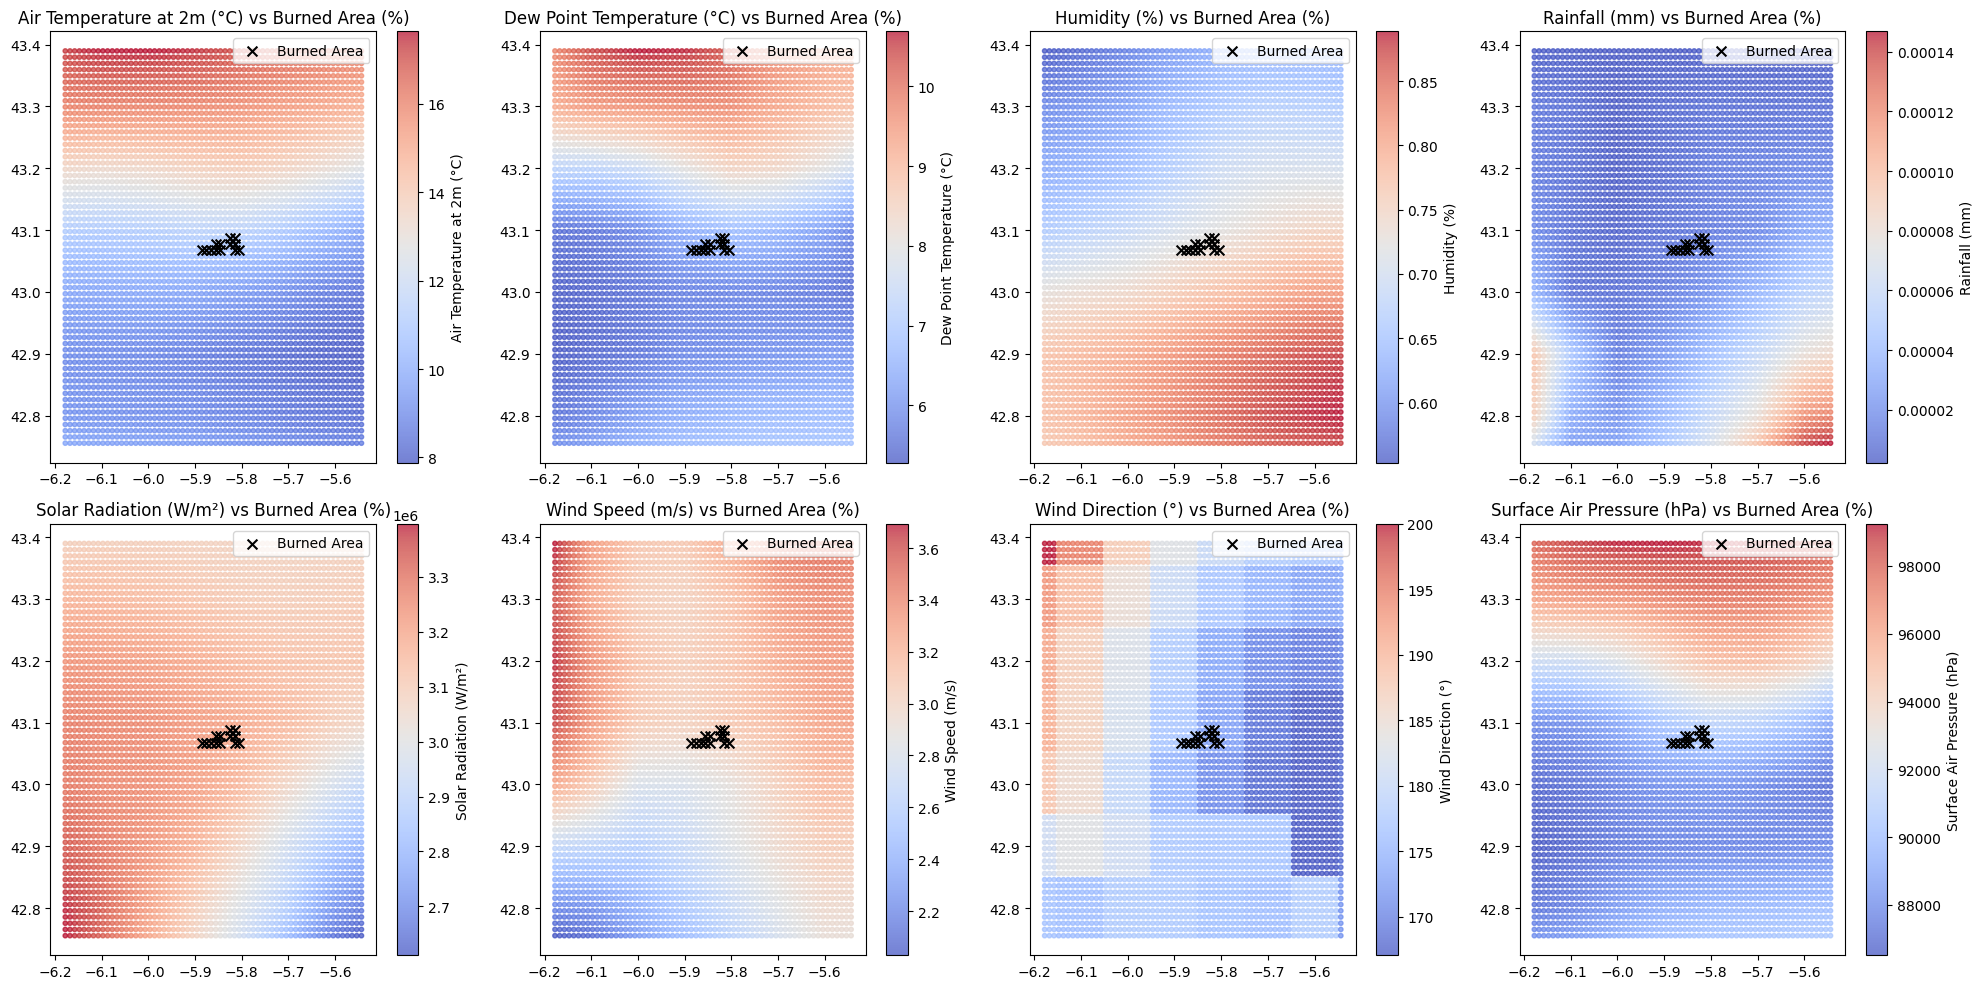

In [16]:
import matplotlib.pyplot as plt
import plotly.express as px
def plot_wildfire_weather_analysis(ds):
    weather_factors = [
        "Air Temperature at 2m (°C)",
        "Dew Point Temperature (°C)",
        "Humidity (%)",
        "Rainfall (mm)",
        "Solar Radiation (W/m²)",
        "Wind Speed (m/s)",
        "Wind Direction (°)",
        "Surface Air Pressure (hPa)"
    ]

    lat, lon = ds["Latitude"].values, ds["Longitude"].values
    lon_mesh, lat_mesh = np.meshgrid(lon, lat)

    burned_area = ds["Burned Area (%)"].mean(dim="time").values.ravel()
    burned_mask = burned_area > 0

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    axes = axes.flatten()

    for i, factor in enumerate(weather_factors):
        if factor in ds:
            factor_data = ds[factor].mean(dim="time").values.ravel()

            if "Temperature" in factor:
                factor_data -= 273.15

            scatter = axes[i].scatter(lon_mesh.ravel(), lat_mesh.ravel(), c=factor_data, cmap="coolwarm", s=10, alpha=0.7)
            axes[i].scatter(lon_mesh.ravel()[burned_mask], lat_mesh.ravel()[burned_mask],
                            color="black", marker="x", label="Burned Area", s=50)
            axes[i].set_title(f"{factor} vs Burned Area (%)")
            plt.colorbar(scatter, ax=axes[i], label=factor)
            axes[i].legend()

    plt.tight_layout()
    plt.show()
plot_wildfire_weather_analysis(ds)

# **Atmospheric conditions at ignition**

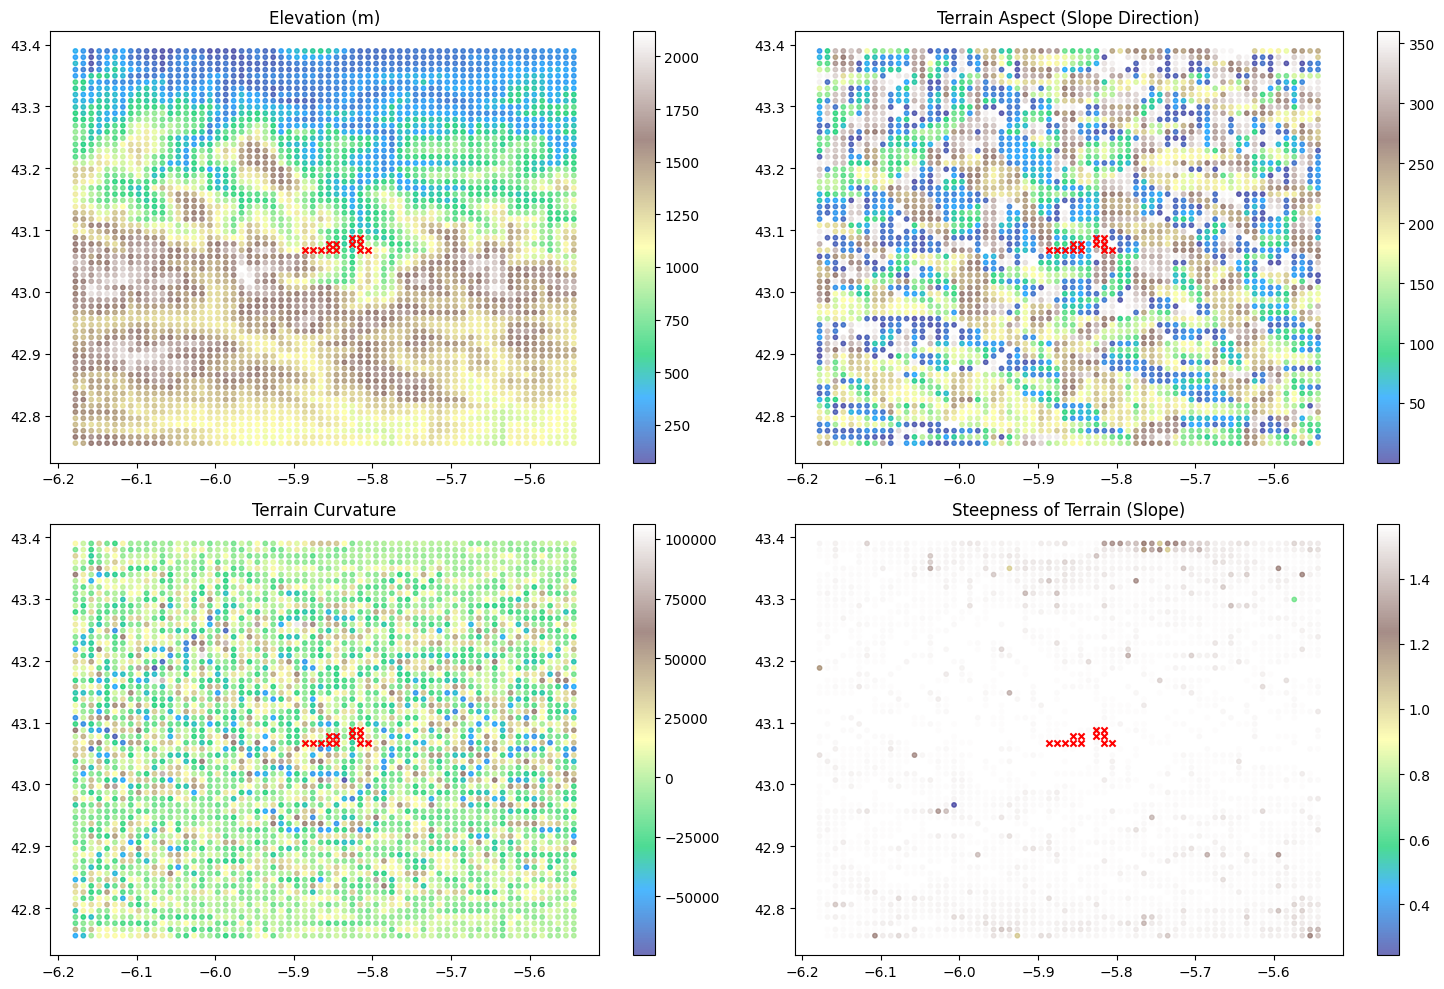

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_terrain_topography(ds):
    factors = [
        "Elevation (m)",
        "Terrain Aspect (Slope Direction)",
        "Terrain Curvature",
        "Steepness of Terrain (Slope)"
    ]

    latitudes = ds["Latitude"].values
    longitudes = ds["Longitude"].values
    lon_mesh, lat_mesh = np.meshgrid(longitudes, latitudes)

    burned_area = ds["Burned Area (%)"].values.ravel()
    burned_mask = burned_area > 0

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.flatten()

    for i, factor in enumerate(factors):
        if factor in ds:
            factor_data = ds[factor].values.ravel()
            sc = axes[i].scatter(lon_mesh.ravel(), lat_mesh.ravel(), c=factor_data, cmap="terrain", s=10, alpha=0.7)
            axes[i].scatter(lon_mesh.ravel()[burned_mask], lat_mesh.ravel()[burned_mask], color="red", marker="x", s=20, label="Burned Area")
            axes[i].set_title(factor)
            plt.colorbar(sc, ax=axes[i])

    plt.tight_layout()
    plt.show()

# Example usage:
plot_terrain_topography(ds)


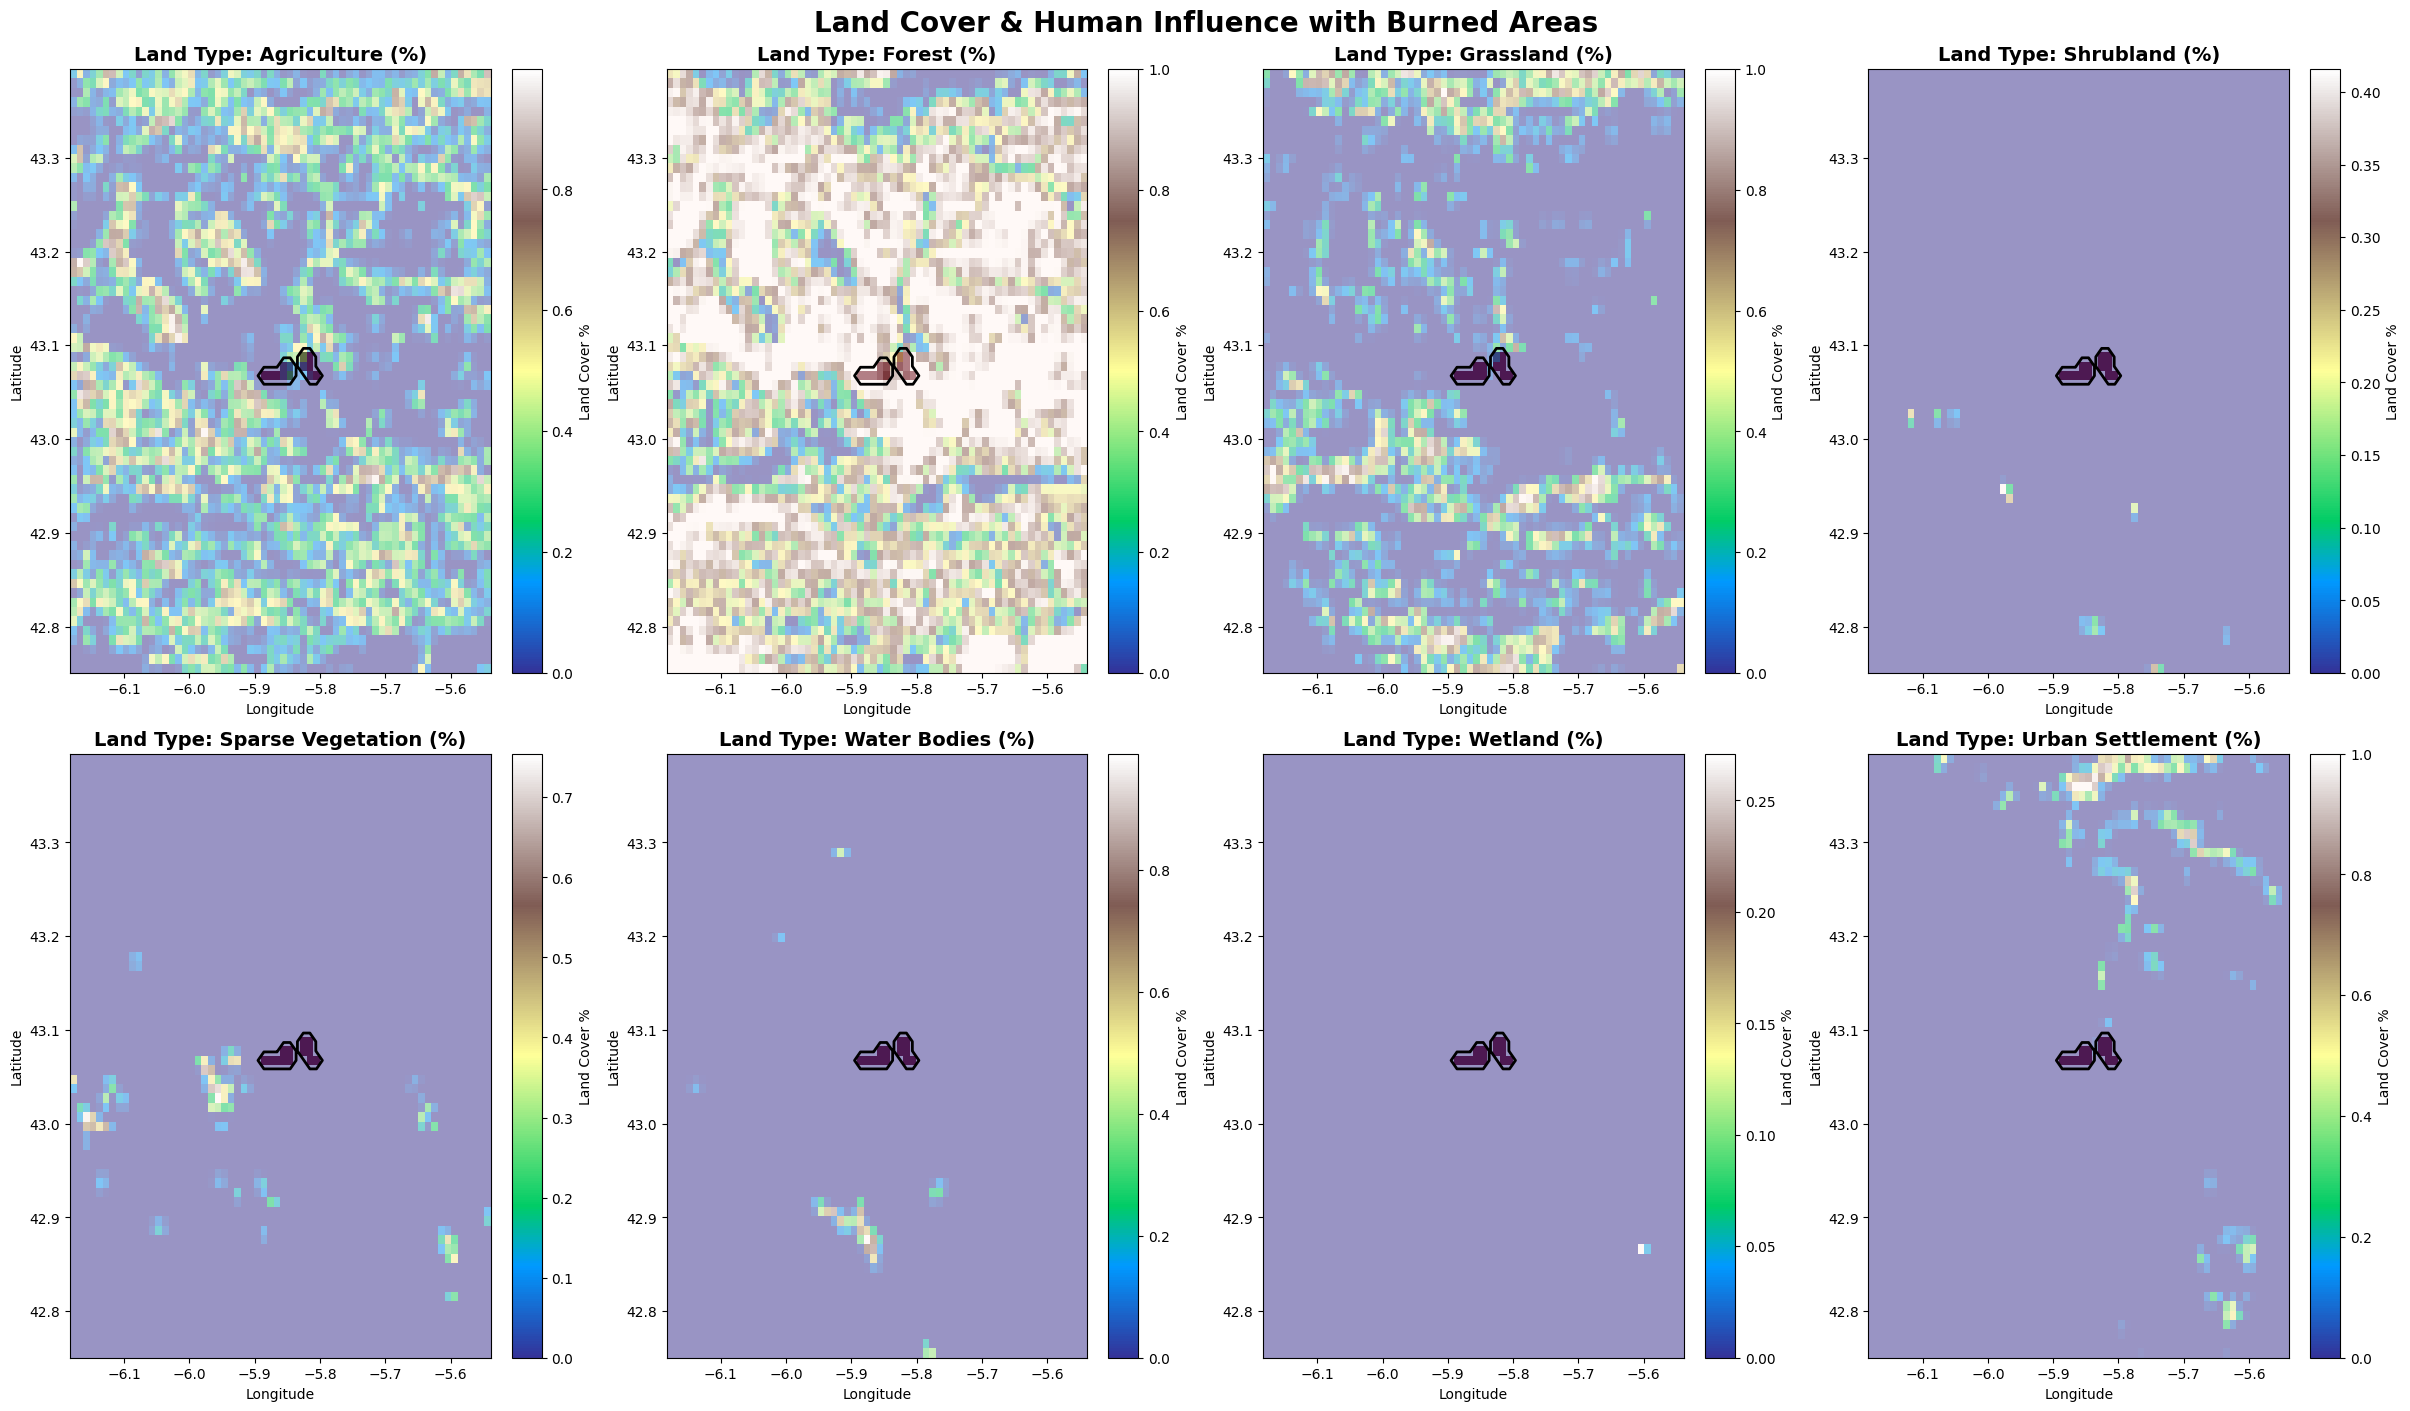

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_land_cover_human_influence(ds):
    factors = [
        "Land Type: Agriculture (%)",
        "Land Type: Forest (%)",
        "Land Type: Grassland (%)",
        "Land Type: Shrubland (%)",
        "Land Type: Sparse Vegetation (%)",
        "Land Type: Water Bodies (%)",
        "Land Type: Wetland (%)",
        "Land Type: Urban Settlement (%)"
    ]

    latitudes = ds["Latitude"].values
    longitudes = ds["Longitude"].values
    burned_area = ds["Burned Area (%)"].values

    if burned_area.ndim == 3:
        burned_area = burned_area[0]

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 14), constrained_layout=True)
    axes = axes.flatten()

    for i, factor in enumerate(factors):
        if factor in ds:
            factor_data = ds[factor].values
            if factor_data.ndim == 3:
                factor_data = factor_data[0]

            im = axes[i].pcolormesh(longitudes, latitudes, factor_data, cmap="terrain", shading="auto")
            burned_mask = burned_area > 0
            axes[i].pcolormesh(longitudes, latitudes, burned_mask, cmap="Reds", shading="auto", alpha=0.5)
            axes[i].contour(longitudes, latitudes, burned_area, levels=[0.1], colors="black", linewidths=2)

            axes[i].set_title(factor, fontsize=14, fontweight="bold")
            axes[i].set_xlabel("Longitude")
            axes[i].set_ylabel("Latitude")
            plt.colorbar(im, ax=axes[i], label="Land Cover %")

    plt.suptitle("Land Cover & Human Influence with Burned Areas", fontsize=20, fontweight="bold")

    plt.show()


plot_land_cover_human_influence(ds)


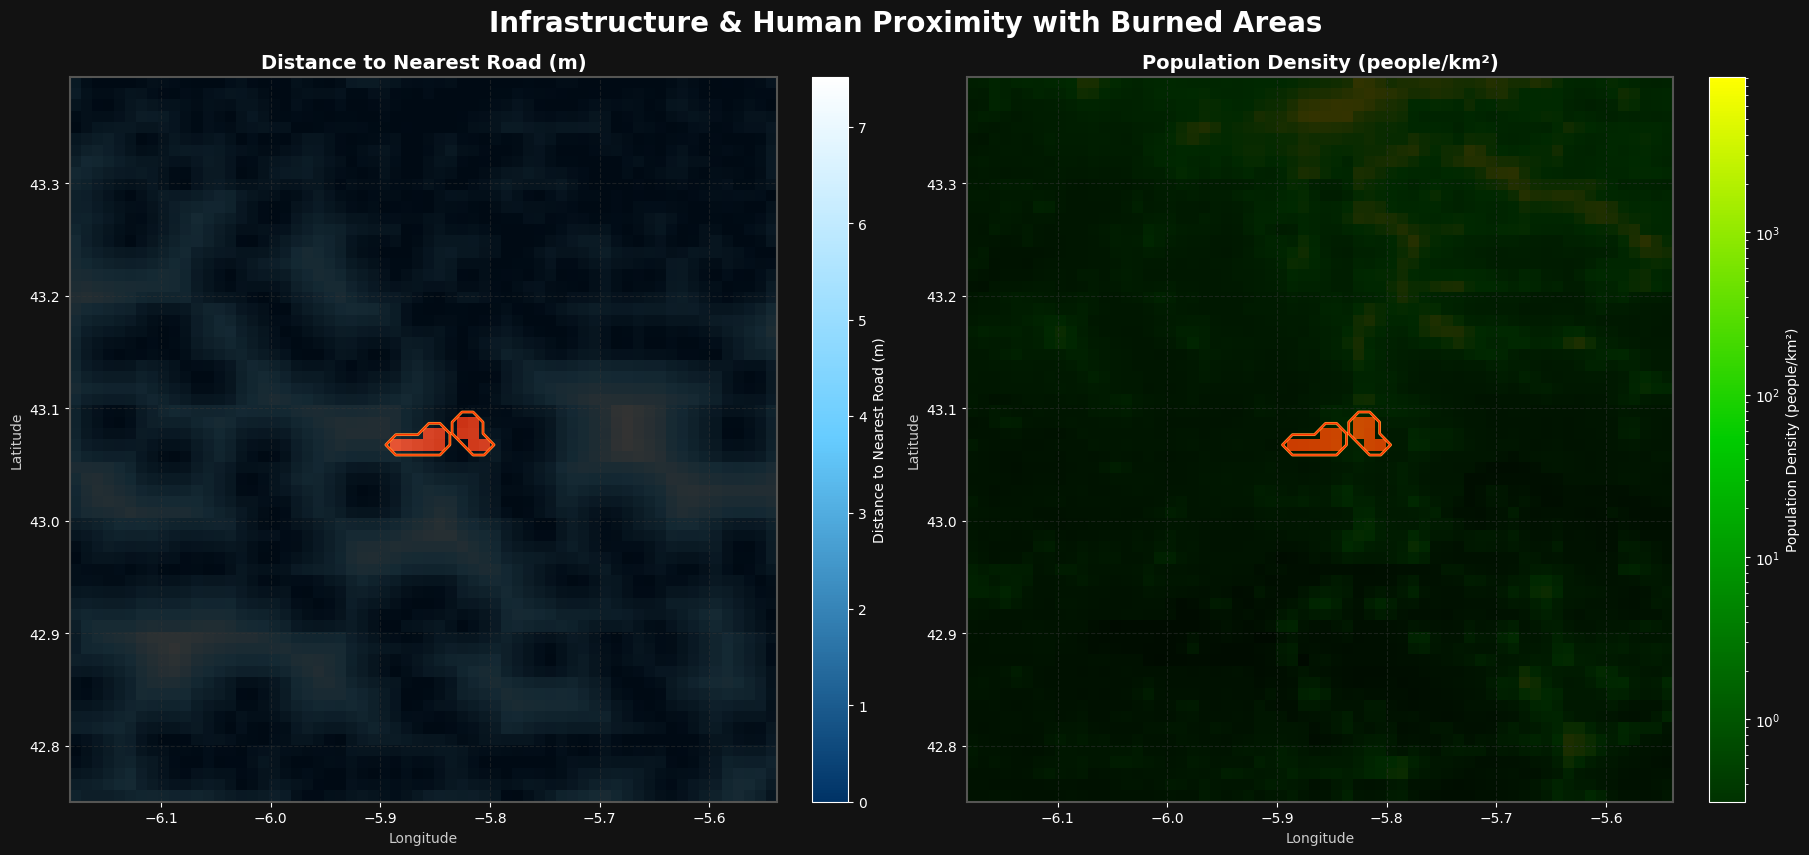

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def plot_infrastructure_factors(ds):
    factors = [
        "Distance to Nearest Road (m)",
        "Population Density (people/km²)"
    ]

    latitudes = ds["Latitude"].values
    longitudes = ds["Longitude"].values
    burned_area = ds["Burned Area (%)"].values

    if burned_area.ndim == 3:
        burned_area = burned_area[0]

    # Create figure with dark background style
    plt.style.use('dark_background')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8),
                           constrained_layout=True, facecolor='#121212')

    # Custom dark colormaps
    road_cmap = mcolors.LinearSegmentedColormap.from_list(
        'road_cmap', ['#003366', '#66CCFF', '#FFFFFF'])  # Dark blue to light blue to white

    pop_cmap = mcolors.LinearSegmentedColormap.from_list(
        'pop_cmap', ['#003300', '#00CC00', '#FFFF00'])  # Dark green to bright green to yellow

    # Burned area colormap (transparent to dark red)
    burned_cmap = mcolors.ListedColormap(['#00000000', '#FF3300'])  # Transparent to bright red

    for i, factor in enumerate(factors):
        if factor in ds:
            factor_data = ds[factor].values
            if factor_data.ndim == 3:
                factor_data = factor_data[0]

            # Select appropriate colormap
            cmap = road_cmap if "Road" in factor else pop_cmap

            # Plot main factor data with logarithmic normalization for better visibility
            norm = mcolors.LogNorm() if "Population" in factor else None
            im = axes[i].pcolormesh(longitudes, latitudes, factor_data,
                                   cmap=cmap, shading="auto", norm=norm)

            # Plot burned areas with high contrast
            burned_mask = burned_area > 0
            axes[i].pcolormesh(longitudes, latitudes, burned_mask,
                             cmap=burned_cmap, shading="auto", alpha=0.8)

            # Add contour for burned areas with glowing effect
            axes[i].contour(longitudes, latitudes, burned_area,
                          levels=[0.1], colors='#FF9933', linewidths=2)
            axes[i].contour(longitudes, latitudes, burned_area,
                          levels=[0.1], colors='#FF3300', linewidths=1)

            # Styling
            axes[i].set_title(factor, fontsize=14, fontweight="bold", color='white')
            axes[i].set_xlabel("Longitude", color='#CCCCCC')
            axes[i].set_ylabel("Latitude", color='#CCCCCC')

            # Customize colorbar
            cbar = plt.colorbar(im, ax=axes[i])
            cbar.set_label(factor, color='white')
            cbar.ax.yaxis.set_tick_params(color='white')
            plt.setp(cbar.ax.get_yticklabels(), color='white')

            # Grid lines
            axes[i].grid(color='#333333', linestyle='--', alpha=0.5)

    # Main title with glow effect
    plt.suptitle("Infrastructure & Human Proximity with Burned Areas",
                fontsize=20, fontweight="bold", color='white',
                y=1.05)

    # Add dark outline to all elements for better visibility
    for ax in axes:
        for spine in ax.spines.values():
            spine.set_edgecolor('#555553')
            spine.set_linewidth(1.5)

    plt.show()

plot_infrastructure_factors(ds)

In [21]:
!pip install cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 109.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


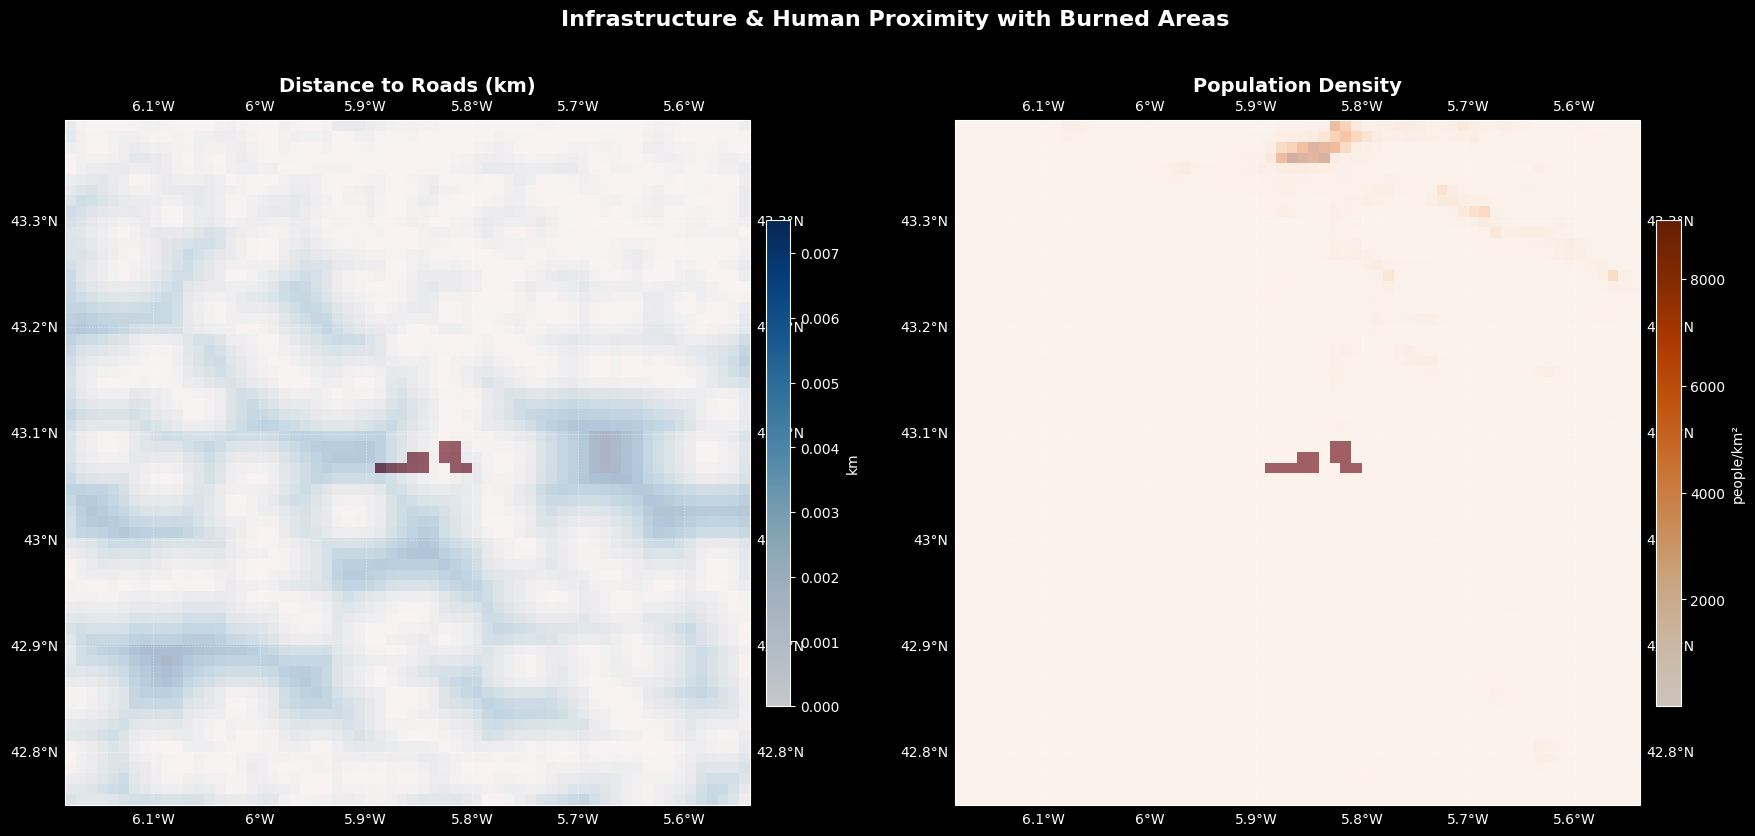

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def plot_infrastructure_factors(ds):
    factors = [
        "Distance to Nearest Road (m)",
        "Population Density (people/km²)"
    ]

    var_titles = {
        "Distance to Nearest Road (m)": "Distance to Roads (km)",
        "Population Density (people/km²)": "Population Density"
    }

    latitudes = ds["Latitude"].values
    longitudes = ds["Longitude"].values
    burned_area = ds["Burned Area (%)"].values

    if burned_area.ndim == 3:
        burned_area = burned_area[0]

    fig, axes = plt.subplots(1, 2, figsize=(18, 8),
                             subplot_kw={'projection': ccrs.PlateCarree()})

    for i, factor in enumerate(factors):
        ax = axes[i]

        ax.add_feature(cfeature.LAND, facecolor="lightgray")
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
        ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="black")
        ax.add_feature(cfeature.RIVERS, edgecolor="blue", alpha=0.5)

        factor_data = ds[factor].values
        if factor_data.ndim == 3:
            factor_data = factor_data[0]

        cmap = 'Blues' if "Road" in factor else 'Oranges'

        if "Road" in factor:
            factor_data = factor_data / 1000  # Convert meters to km

        im = ax.pcolormesh(longitudes, latitudes, factor_data,
                           transform=ccrs.PlateCarree(),
                           cmap=cmap, alpha=0.8, shading='auto')

        burned_mask = burned_area > 0
        ax.pcolormesh(longitudes, latitudes, burned_mask,
                      transform=ccrs.PlateCarree(),
                      cmap='Reds', alpha=0.6, shading='auto')

        ax.set_title(var_titles[factor], fontsize=14, fontweight='bold')

        cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, shrink=0.7)
        cbar.set_label('km' if "Road" in factor else 'people/km²', fontsize=10)

        ax.gridlines(draw_labels=True, linestyle=":", alpha=0.5)

    plt.suptitle("Infrastructure & Human Proximity with Burned Areas",
                 fontsize=16, fontweight='bold', y=1.02)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_infrastructure_factors(ds)


# **Vegetation health and moisture**

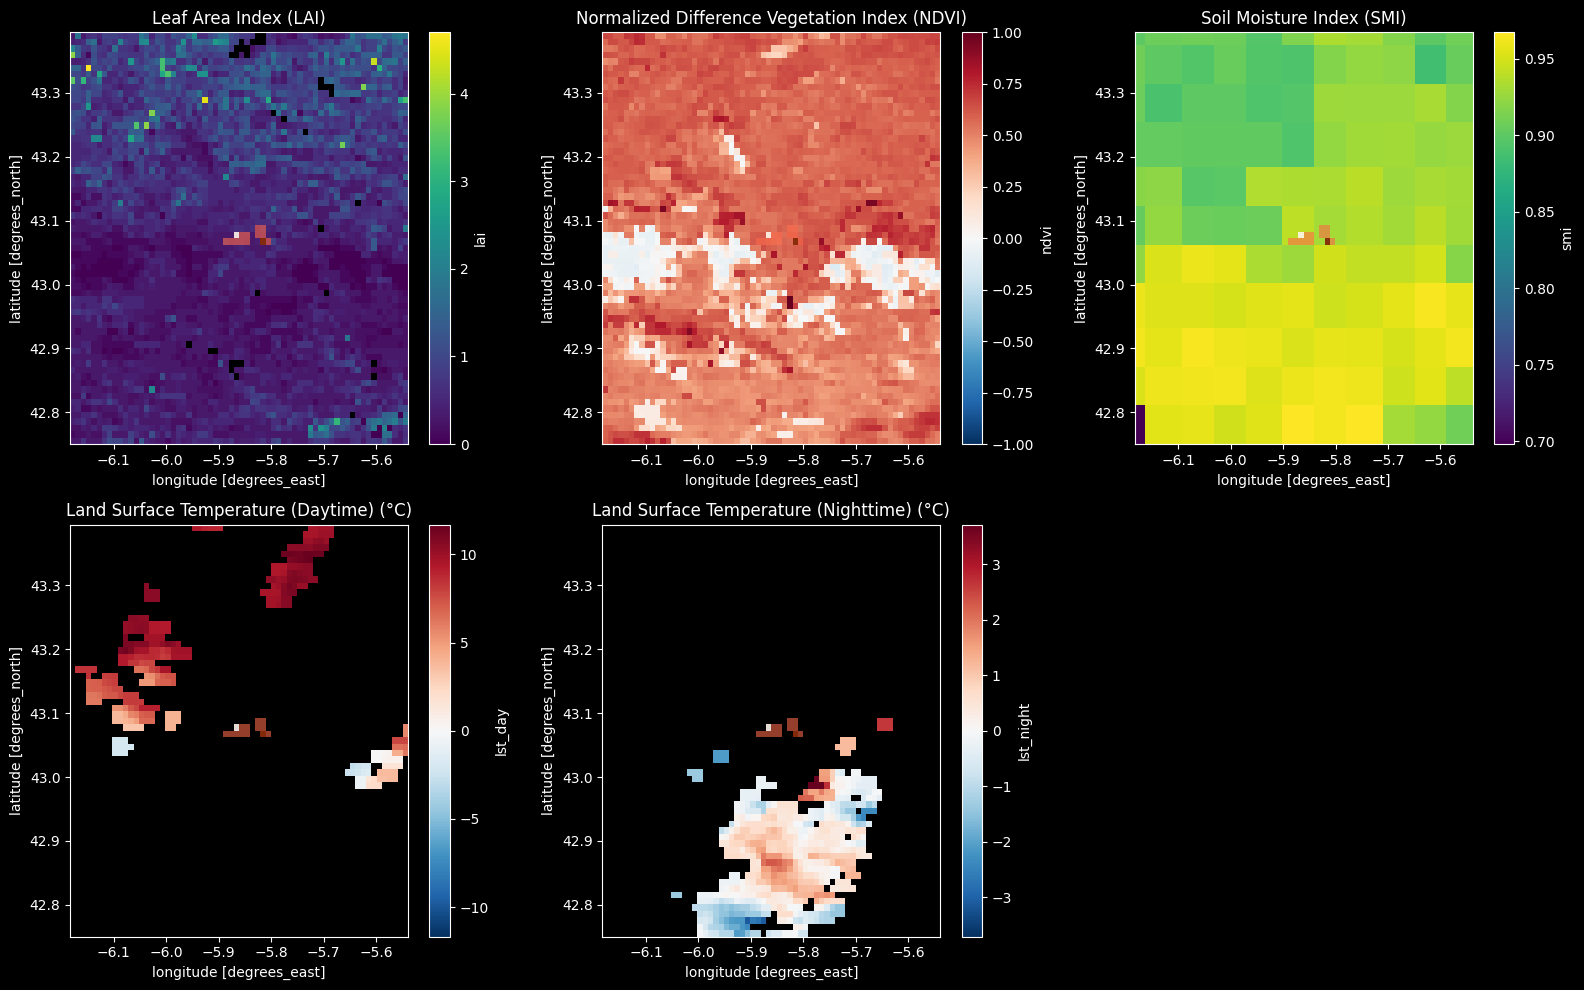

In [26]:
import matplotlib.pyplot as plt
# Vegetation-related variables
vegetation_vars = ['lai', 'ndvi', 'smi', 'lst_day', 'lst_night']

# Define meaningful titles with correct units
var_titles = {
    'lai': 'Leaf Area Index (LAI)',
    'ndvi': 'Normalized Difference Vegetation Index (NDVI)',
    'smi': 'Soil Moisture Index (SMI)',
    'lst_day': 'Land Surface Temperature (Daytime) (°C)',
    'lst_night': 'Land Surface Temperature (Nighttime) (°C)'
}

# Convert temperature variables from Kelvin to Celsius
ds['lst_day'] = ds['lst_day'] - 273.15
ds['lst_night'] = ds['lst_night'] - 273.15

# Create subplots dynamically based on the number of variables
fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # 2 rows, 3 columns

# Flatten axes to ensure compatibility
axes = axes.flat

# Loop through vegetation variables and plot
for i, var in enumerate(vegetation_vars):
    im = ds[var].isel(time=0).plot(ax=axes[i])  # Plot variable
    burned = ds['burned_areas'].isel(time=0)
    burned.where(burned > 0).plot(ax=axes[i], cmap='Reds', alpha=0.6, add_colorbar=False)  # Overlay burned areas
    ignition = ds['ignition_points'].isel(time=0)
    ignition.where(ignition > 0).plot(ax=axes[i], cmap='Oranges', alpha=0.9, add_colorbar=False)  # Overlay ignition points

    axes[i].set_title(var_titles[var])  # Explicitly set title after all plots

# Remove any extra empty subplot
for j in range(len(vegetation_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


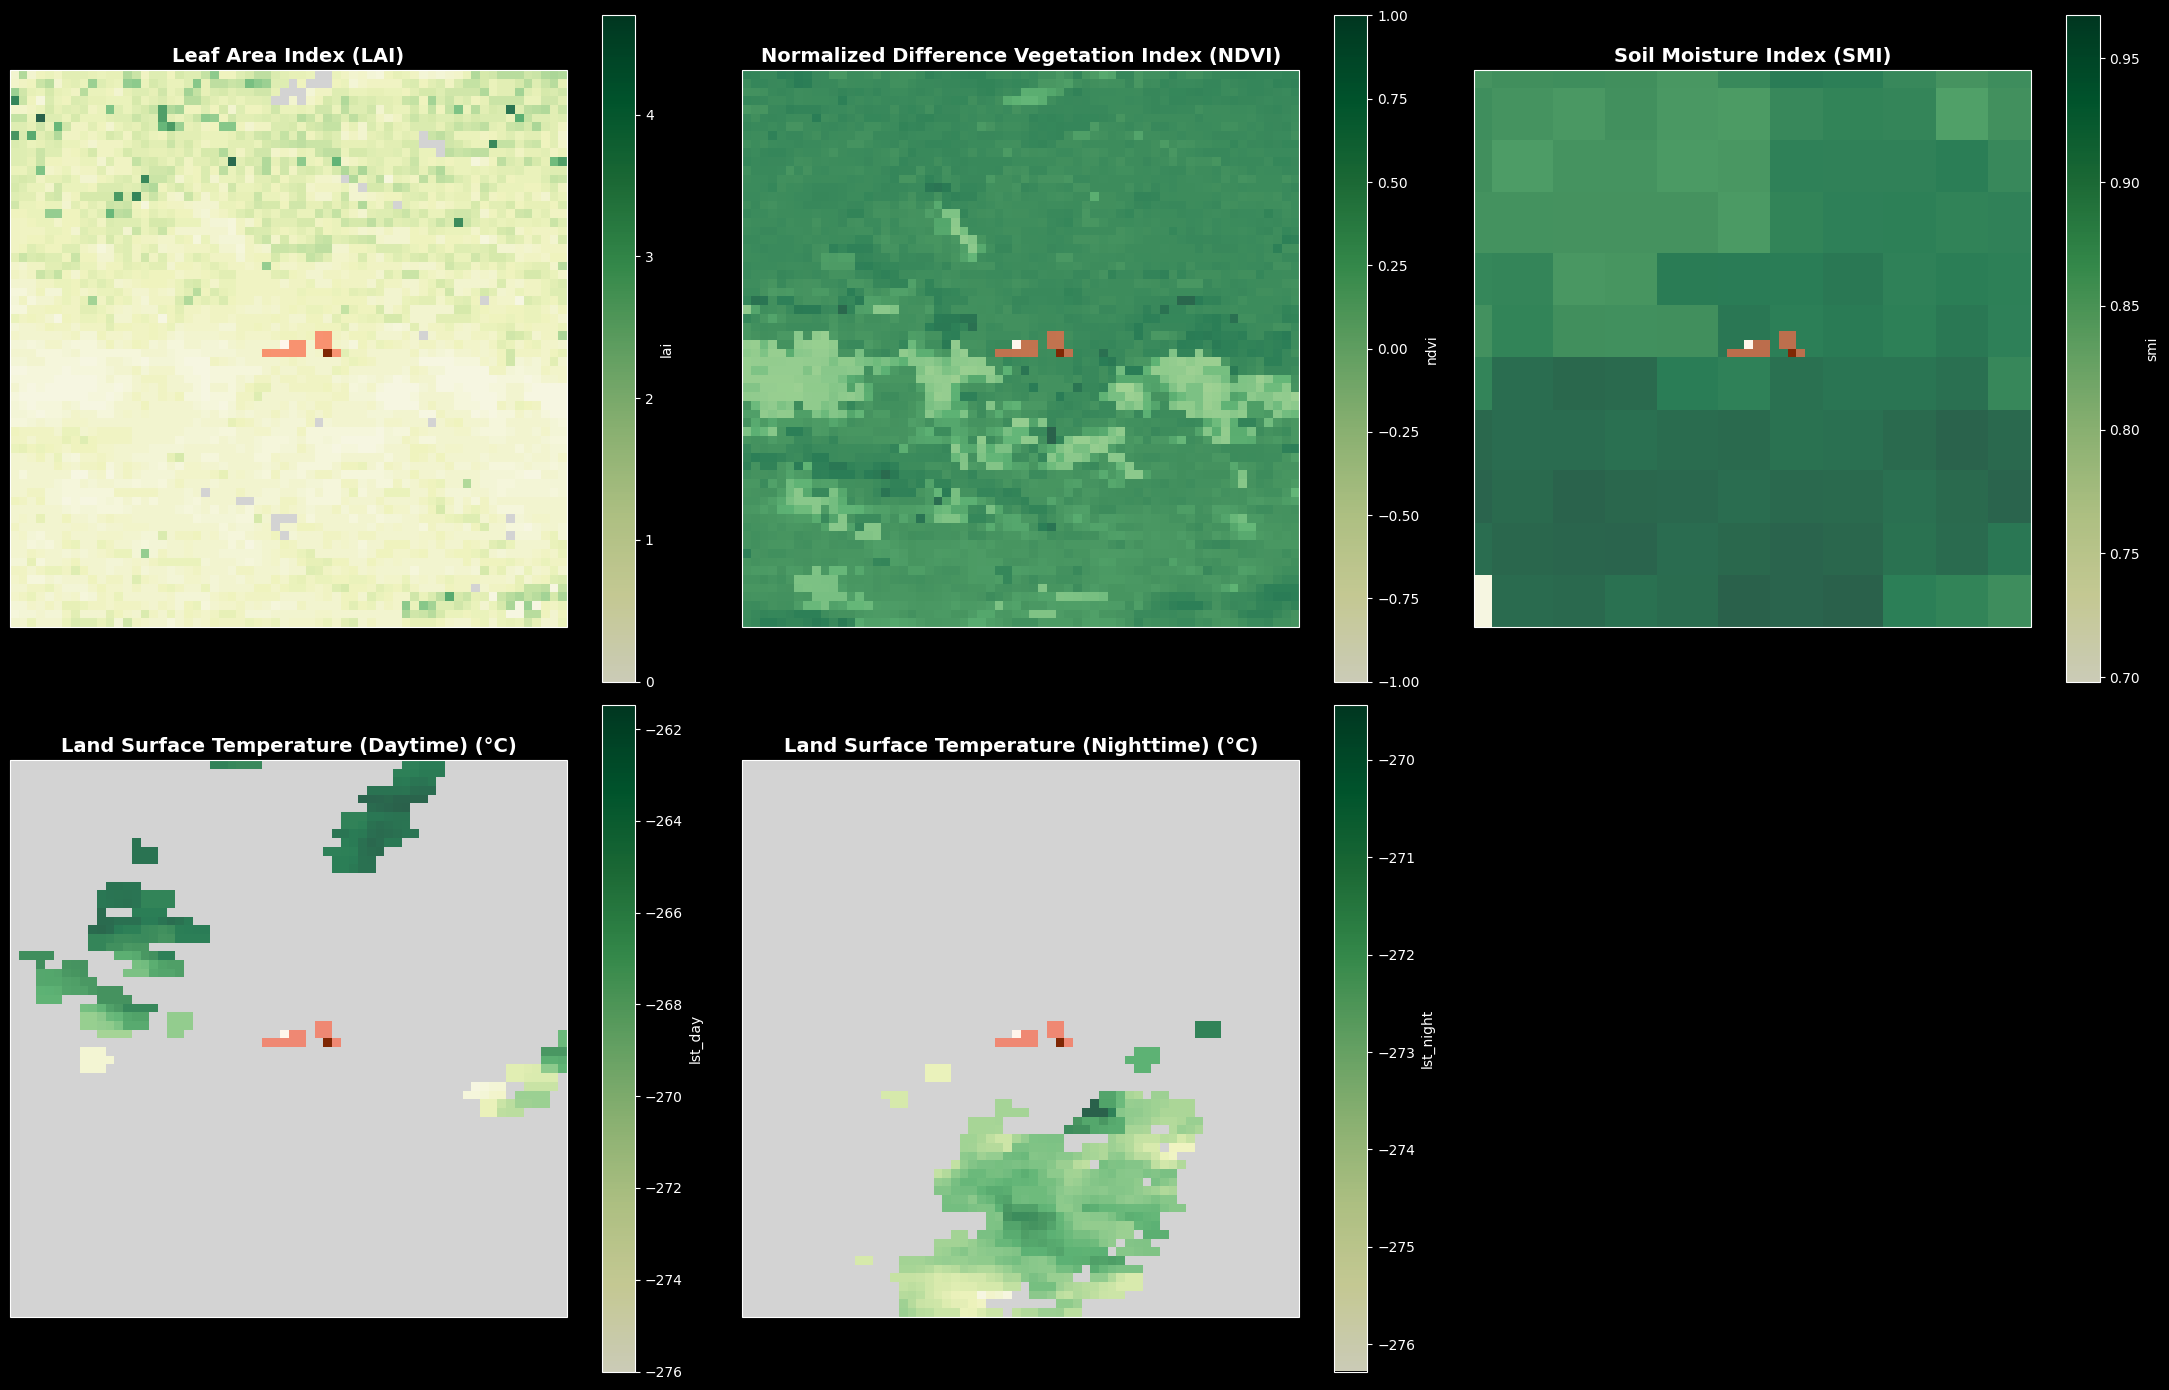

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Convert temperature variables from Kelvin to Celsius
ds['lst_day'] = ds['lst_day'] - 273.15
ds['lst_night'] = ds['lst_night'] - 273.15

# Vegetation-related variables and titles
vegetation_vars = ['lai', 'ndvi', 'smi', 'lst_day', 'lst_night']
var_titles = {
    'lai': 'Leaf Area Index (LAI)',
    'ndvi': 'Normalized Difference Vegetation Index (NDVI)',
    'smi': 'Soil Moisture Index (SMI)',
    'lst_day': 'Land Surface Temperature (Daytime) (°C)',
    'lst_night': 'Land Surface Temperature (Nighttime) (°C)'
}

# Create subplots with a high-quality map projection
fig, axes = plt.subplots(2, 3, figsize=(22, 14), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flat

for i, var in enumerate(vegetation_vars):
    ax = axes[i]

    # Add background features for better clarity
    ax.add_feature(cfeature.LAND, facecolor="lightgray", edgecolor="none")
    ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")
    ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="black")
    ax.add_feature(cfeature.RIVERS, edgecolor="blue", alpha=0.5)

    # Plot the vegetation variable with a better colormap
    ds[var].isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='YlGn', alpha=0.8)

    # Overlay burned areas (Deep Red)
    burned = ds['burned_areas'].isel(time=0)
    burned.where(burned > 0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', alpha=0.7, add_colorbar=False)

    # Overlay ignition points (Bright Red)
    ignition = ds['ignition_points'].isel(time=0)
    ignition.where(ignition > 0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Oranges', alpha=1.0, add_colorbar=False)

    # Set title
    ax.set_title(var_titles[var], fontsize=14, fontweight='bold')

# Remove any empty subplot
for j in range(len(vegetation_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# ***Human influence factors***

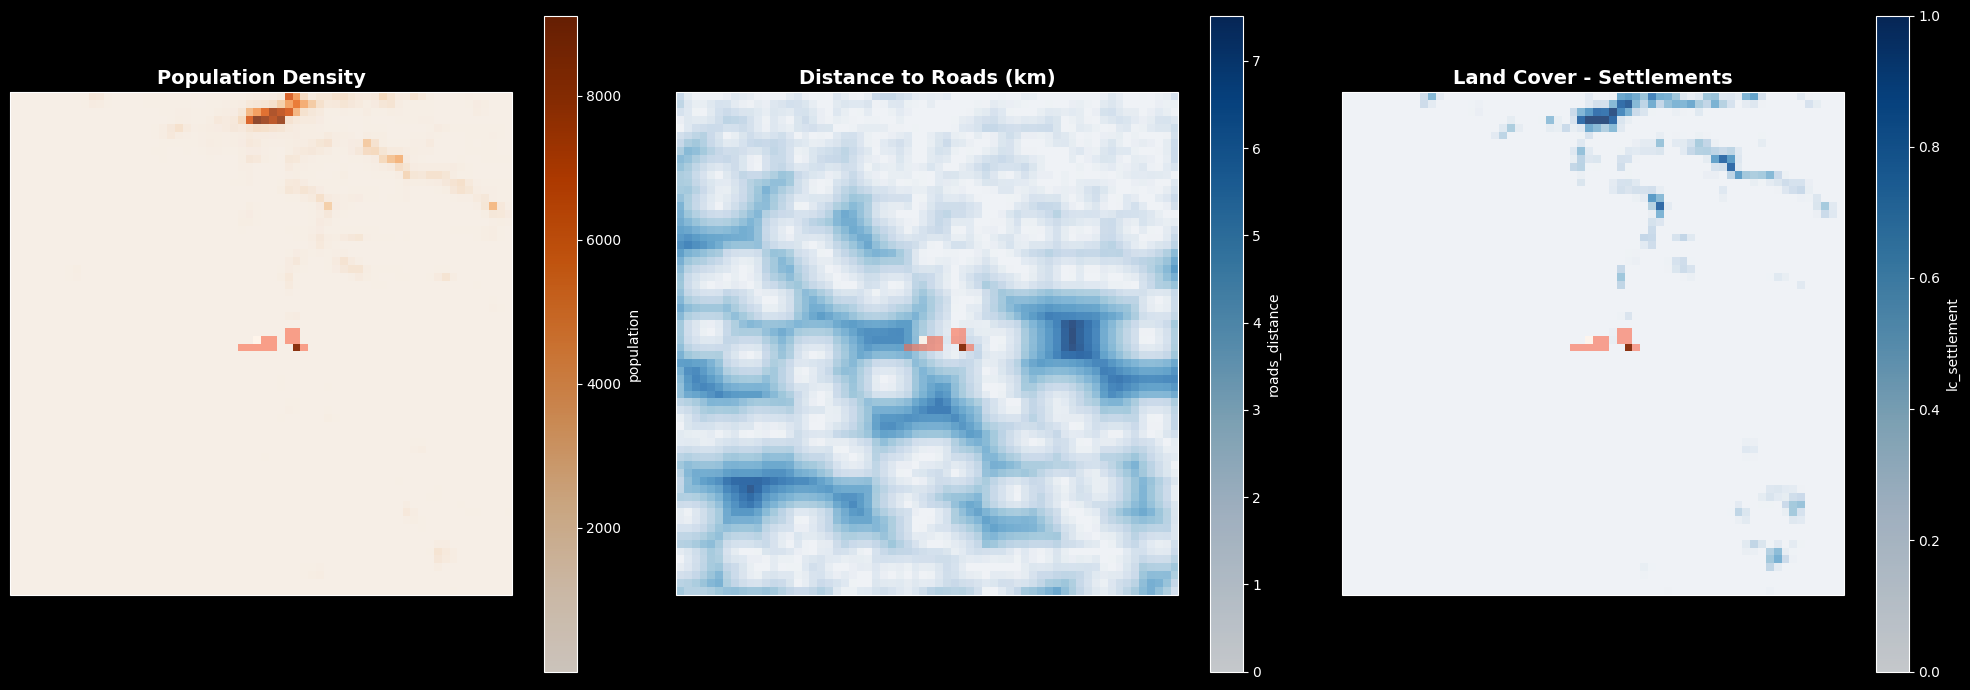

In [32]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
ds = xr.open_dataset('/content/drive/MyDrive/b.final_burned_area/2022/sample_15768.nc')
ds
# Anthropogenic variables and proper titles
anthropogenic_vars = ['population', 'roads_distance', 'lc_settlement']
var_titles = {
    'population': 'Population Density',
    'roads_distance': 'Distance to Roads (km)',
    'lc_settlement': 'Land Cover - Settlements'
}

# Create subplots with map projection
fig, axes = plt.subplots(1, 3, figsize=(20, 7), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flat

for i, var in enumerate(anthropogenic_vars):
    ax = axes[i]

    # Add map background features
    ax.add_feature(cfeature.LAND, facecolor="lightgray", edgecolor="none")
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor="black")
    ax.add_feature(cfeature.BORDERS, linestyle=":", edgecolor="black")
    ax.add_feature(cfeature.RIVERS, edgecolor="blue", alpha=0.5)

    # Plot the anthropogenic variable
    cmap = 'Oranges' if var == 'population' else 'Blues'
    ds[var].plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, alpha=0.8)  # Removed isel(time=0)

    # Overlay burned areas (Red)
    burned = ds['burned_areas']
    burned.where(burned > 0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', alpha=0.6, add_colorbar=False)

    # Overlay ignition points (Bright Red)
    ignition = ds['ignition_points']
    ignition.where(ignition > 0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Oranges', alpha=0.9, add_colorbar=False)

    # Set title
    ax.set_title(var_titles[var], fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


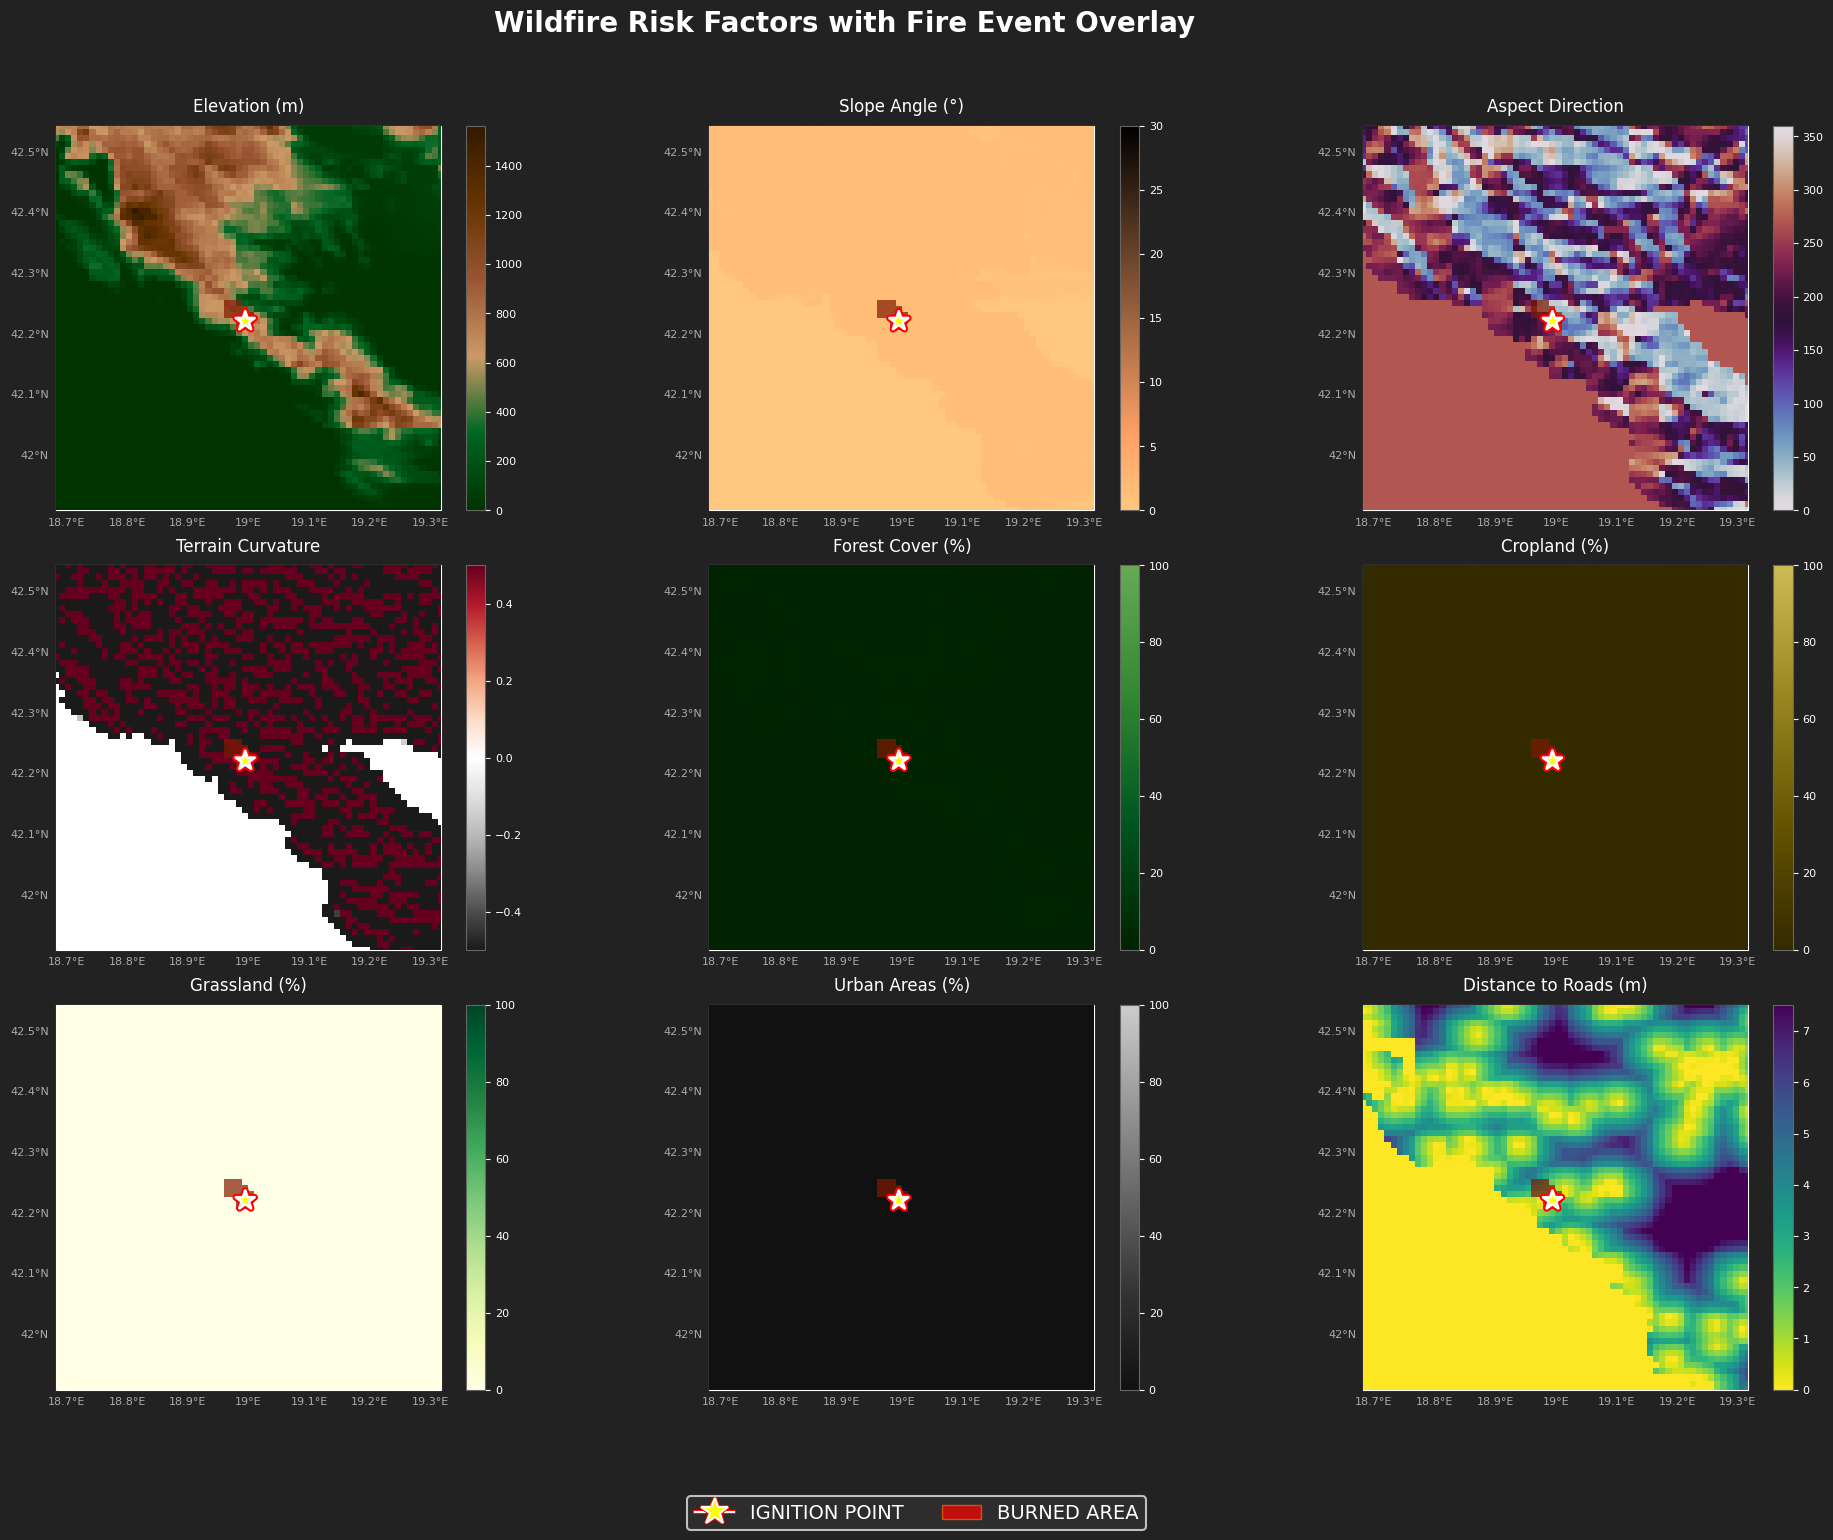

In [34]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.patheffects as path_effects
ds = xr.open_dataset('/content/drive/MyDrive/b.final_burned_area/2022/sample_15809.nc')
land_vars = [
    # Topography
    'dem', 'slope', 'aspect', 'curvature',
    # Land cover
    'lc_forest', 'lc_agriculture', 'lc_grassland', 'lc_settlement',
    # Human influence
    'roads_distance'
]

var_titles = {
    'dem': 'Elevation (m)',
    'slope': 'Slope Angle (°)',
    'aspect': 'Aspect Direction',
    'curvature': 'Terrain Curvature',
    'roads_distance': 'Distance to Roads (m)',
    'lc_forest': 'Forest Cover (%)',
    'lc_agriculture': 'Cropland (%)',
    'lc_settlement': 'Urban Areas (%)',
    'lc_grassland': 'Grassland (%)'
}

topo_cmap = LinearSegmentedColormap.from_list('terrain_dark',
             ['#003300', '#006622', '#cc9966', '#995533', '#663300', '#331a00'])
forest_cmap = LinearSegmentedColormap.from_list('forest_dark',
             ['#002200', '#005522', '#338833', '#66aa55'])
urban_cmap = LinearSegmentedColormap.from_list('urban_dark',
             ['#111111', '#333333', '#666666', '#999999', '#cccccc'])
agriculture_cmap = LinearSegmentedColormap.from_list('agri_dark',
                  ['#332a00', '#665500', '#998822', '#ccbb55'])

# Create figure with dark background
fig = plt.figure(figsize=(20, 15), facecolor='#222222')
fig.suptitle('Wildfire Risk Factors with Fire Event Overlay',
             fontsize=20, y=1.02, fontweight='bold', color='white')

# Create subplots with dark theme
axes = []
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1, projection=ccrs.PlateCarree(), facecolor='#222222')
    axes.append(ax)

# Fire visualization parameters
burned_cmap = LinearSegmentedColormap.from_list('burned_dark', ['#00000000', '#ff3300'])
ignition_cmap = LinearSegmentedColormap.from_list('ignition_dark', ['#00000000', '#ffff00'])

for i, (var, ax) in enumerate(zip(land_vars, axes)):
    # Set up dark map features
    ax.set_extent([ds.x.min(), ds.x.max(), ds.y.min(), ds.y.max()], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='#333333', zorder=0)
    ax.add_feature(cfeature.OCEAN.with_scale('10m'), facecolor='#112233', zorder=0)
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.8, zorder=2, edgecolor='#aaaaaa')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':', zorder=2, edgecolor='#666666')
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='#224466', zorder=1)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='#5588ff', linewidth=0.8, zorder=1)

    # Select specialized colormap for each variable
    if var == 'dem':
        cmap = topo_cmap
        vmin, vmax = ds[var].min(), ds[var].max()
    elif var == 'slope':
        cmap = 'copper_r'
        vmin, vmax = 0, 30  # Typical slope range in degrees
    elif var == 'aspect':
        cmap = 'twilight'
        vmin, vmax = 0, 360
    elif var == 'curvature':
        cmap = 'RdGy_r'
        vmin, vmax = -0.5, 0.5
    elif var == 'roads_distance':
        cmap = 'viridis_r'
        vmin, vmax = 0, ds[var].quantile(0.95)
    elif var == 'lc_forest':
        cmap = forest_cmap
        vmin, vmax = 0, 100
    elif var == 'lc_agriculture':
        cmap = agriculture_cmap
        vmin, vmax = 0, 100
    elif var == 'lc_settlement':
        cmap = urban_cmap
        vmin, vmax = 0, 100
    else:  # grassland
        cmap = 'YlGn'
        vmin, vmax = 0, 100

    # Plot main variable with dark theme
    im = ds[var].plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax,
                      transform=ccrs.PlateCarree(), add_colorbar=False, zorder=3)

    # Add burned areas with glowing effect
    burned = ds['burned_areas'].max(dim='time')
    burned_plot = burned.where(burned > 0).plot(
        ax=ax, cmap=burned_cmap, transform=ccrs.PlateCarree(),
        add_colorbar=False, zorder=4, alpha=0.7
    )

    # Make ignition points extremely prominent
    ignition = ds['ignition_points'].max(dim='time')
    ignition_coords = np.where(ignition.values > 0)
    if len(ignition_coords[0]) > 0:
        ignition_plot = ax.scatter(
            x=ds.x.values[ignition_coords[1]],
            y=ds.y.values[ignition_coords[0]],
            c='#ffff00', s=200, edgecolor='#ffffff',
            linewidth=2, marker='*', zorder=10,
            transform=ccrs.PlateCarree(),
            path_effects=[plt.matplotlib.patheffects.withStroke(
                linewidth=5, foreground='#ff0000')]
        )

    # Dark theme titles and labels
    ax.set_title(f"{var_titles[var]}", fontsize=12, pad=10, color='white')
    gl = ax.gridlines(
        crs=ccrs.PlateCarree(), draw_labels=True,
        linewidth=0.5, color='#666666', alpha=0.5, linestyle='--'
    )
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'color': '#aaaaaa', 'size': 8}
    gl.ylabel_style = {'color': '#aaaaaa', 'size': 8}

    # Colorbar with dark theme
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8, colors='white')
    cbar.outline.set_edgecolor('#666666')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# Remove empty subplots
for j in range(len(land_vars), len(axes)):
    fig.delaxes(axes[j])

# Enhanced legend with glow effect
legend_elements = [
    plt.Line2D([0], [0], marker='*', color='w', label='IGNITION POINT',
              markerfacecolor='yellow', markersize=20, markeredgecolor='white',
              markeredgewidth=1.5, path_effects=[plt.matplotlib.patheffects.withStroke(
                  linewidth=3, foreground='red')]),
    plt.Rectangle((0,0), 1, 1, fc='red', alpha=0.7, label='BURNED AREA',
                edgecolor='#ff6600', linewidth=1)
]

leg = fig.legend(
    handles=legend_elements, loc='lower center',
    ncol=2, fontsize=14, framealpha=0.7, facecolor='#333333',
    edgecolor='white', labelcolor='white'
)
leg.get_frame().set_linewidth(1.5)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

In [1]:
!pip install torch
!pip install pytorch-lightning
!pip install torchmetrics
!pip install xarray
!pip install numpy
!pip install segmentation-models-pytorch


# **Model Implementation**

In [2]:
import torch
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
import argparse
from pathlib import Path
import os
import sys
import xarray as xr
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchmetrics import AUROC, AveragePrecision, F1Score
import segmentation_models_pytorch as smp
import pickle



In [38]:

# Define the dataset class
class BatcherDS(Dataset):
    def __init__(self, samples, input_vars, target, min_max_dict=None, crop_size=0):
        self.samples = samples
        self.target = target
        self.input_vars = input_vars
        self.min_max_dict = min_max_dict
        if min_max_dict:
            self.min = np.stack([min_max_dict[var]['min'] for var in input_vars])
            self.max = np.stack([min_max_dict[var]['max'] for var in input_vars])
        self.crop_size = crop_size

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx].isel(time=-1)
        sample['ignition_points'] = sample['ignition_points'].where(sample['ignition_points'] == 0, 1)

        inputs = np.stack([sample[var] for var in self.input_vars]).astype(np.float32)
        for i, var in enumerate(self.input_vars):
            if not var.startswith('lc_') and (var != 'ignition_points'):
                if self.min_max_dict:
                    inputs[i] = (inputs[i] - self.min[i]) / (self.max[i] - self.min[i])

        inputs = np.nan_to_num(inputs, nan=0.0)
        target = sample[self.target].values
        target = np.nan_to_num(target, nan=0.0)
        target = np.where(target != 0, 1, 0)

        len_x = inputs.shape[1]
        len_y = inputs.shape[2]

        if self.crop_size > 0:
            start_x = np.random.randint(0, len_x - self.crop_size)
            start_y = np.random.randint(0, len_y - self.crop_size)
            end_x = start_x + self.crop_size
            end_y = start_y + self.crop_size
            inputs = inputs[:, start_x:end_x, start_y:end_y]
            target = target[start_x:end_x, start_y:end_y]

        return torch.tensor(inputs), torch.tensor(target)


In [39]:

# Define the model class
class plUNET(pl.LightningModule):
    def __init__(self, input_vars, lr=0.001, weight_decay=0.0005, loss='dice', encoder_name='efficientnet-b1'):
        super().__init__()
        self.save_hyperparameters(logger=False)
        self.net = smp.UnetPlusPlus(encoder_name=encoder_name, in_channels=len(input_vars), classes=2)
        if loss == 'dice':
            self.criterion = smp.losses.DiceLoss(mode='multiclass')
        elif loss == 'ce':
            self.criterion = torch.nn.CrossEntropyLoss()

        self.val_auprc = AveragePrecision( num_classes=1,task="binary")
        self.test_auprc = AveragePrecision( num_classes=1,task="binary")

    def forward(self, x):
        return self.net(x)

    def step(self, batch):
        x, y = batch
        y = y.long()
        logits = self.forward(x)
        loss = self.criterion(logits, y)
        preds = torch.nn.functional.softmax(logits, dim=1)[:, 1]
        return loss, preds, y, x

    def training_step(self, batch, batch_idx):
        loss, preds, targets, inputs = self.step(batch)
        self.log("train/loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        return {"loss": loss}

    def validation_step(self, batch, batch_idx):
        loss, preds, targets, inputs = self.step(batch)
        self.val_auprc.update(preds.flatten(), targets.flatten())
        self.log("val/loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("val/auprc", self.val_auprc, on_step=False, on_epoch=True, prog_bar=True)
        return {"loss": loss, "preds": preds.detach().cpu(), "targets": targets.detach().cpu(),
                "inputs": inputs.detach().cpu()}

    def test_step(self, batch, batch_idx):
        loss, preds, targets, inputs = self.step(batch)
        self.test_auprc.update(preds.flatten(), targets.flatten())
        self.log("test/loss", loss, on_step=False, on_epoch=True)
        self.log("test/auprc", self.test_auprc, on_step=False, on_epoch=True, prog_bar=False)
        return {"loss": loss, "preds": preds.detach().cpu(), "inputs": inputs.detach().cpu(),
                "targets": targets.detach().cpu()}

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(
            params=self.parameters(), lr=self.hparams.lr, weight_decay=self.hparams.weight_decay
        )
        lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)
        return {'optimizer': optimizer, 'lr_scheduler': lr_scheduler, "monitor": "train/loss"}


In [55]:

# Define the data module
class TheDataModule(pl.LightningDataModule):
    def __init__(self, dataset_path, input_vars, target, batch_size=64, num_workers=8):
        super().__init__()
        self.dataset_path = Path(dataset_path)
        self.input_vars = input_vars
        self.target = target
        self.batch_size = batch_size
        self.num_workers = num_workers

        # Load normalization dictionary
        with open(f'{dataset_path}/min_max_dict.pkl', 'rb') as f:
            self.min_max_dict = pickle.load(f)

    def setup(self, stage=None):
        train_years = [2006]
        val_years = [2007]
        test_years = [2008]

        def get_sample_paths(year):
            return list((self.dataset_path / f'{year}').glob('*.nc'))

        def _open_samples(path_list):
          opened_samples = []
          for i, path in enumerate(path_list):

              opened_samples.append(xr.open_dataset(path))
          return opened_samples

        # Load training data
        train_sample_paths = []
        for year in train_years:
            train_sample_paths += get_sample_paths(year)
        self.data_train = BatcherDS(_open_samples(train_sample_paths), self.input_vars, self.target,
                                  min_max_dict=self.min_max_dict, crop_size=32)
        print("Training area data collection")
        # Load validation data
        val_sample_paths = []
        for year in val_years:
            val_sample_paths += get_sample_paths(year)
        self.data_val = BatcherDS(_open_samples(val_sample_paths), self.input_vars, self.target,
                                min_max_dict=self.min_max_dict, crop_size=0)
        print("Validation area data collection")
        # Load test data
        test_sample_paths = []
        for year in test_years:
            test_sample_paths += get_sample_paths(year)
        self.data_test = BatcherDS(_open_samples(test_sample_paths), self.input_vars, self.target,
                                 min_max_dict=self.min_max_dict, crop_size=0)

    def train_dataloader(self):
        return DataLoader(self.data_train, batch_size=self.batch_size, num_workers=self.num_workers,
                         shuffle=True, pin_memory=True)

    def val_dataloader(self):
        return DataLoader(self.data_val, batch_size=self.batch_size, num_workers=self.num_workers,
                         shuffle=False, pin_memory=True)

    def test_dataloader(self):
        return DataLoader(self.data_test, batch_size=self.batch_size, num_workers=self.num_workers,
                         shuffle=False, pin_memory=True)


In [56]:
import matplotlib.pyplot as plt

# First, let's define the visualization function
def visualize_full_model_predictions(model, test_sample, save_path='full_model_prediction.png'):
    """
    Generate visualization plots for the full model only
    Args:
        model: Your tra

        ined PyTorch model
        test_sample: Tuple of (input_tensor, target_tensor)
        save_path: Where to save the visualization
    """
    # Prepare model for evaluation
    model.eval()

    with torch.no_grad():
        # Get predictions - using softmax to get probabilities
        inputs, targets = test_sample
        logits = model(inputs.unsqueeze(0))  # Add batch dimension
        pred_probs = torch.softmax(logits, dim=1)[:, 1]  # Positive class probabilities

        # Convert to numpy arrays
        gt = targets.cpu().numpy()
        ignition = inputs[0].cpu().numpy()  # First channel is ignition
        pred_probs = pred_probs.squeeze().cpu().numpy()

    # Create figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Set titles
    titles = [
        "Ignition Points",
        "U-Net Prediction (Probability)",
        "Ground Truth Burned Area"
    ]

    # Plot ignition points (binary)
    axes[0].imshow(ignition, cmap='Reds', vmin=0, vmax=1)
    axes[0].set_title(titles[0])
    axes[0].axis('off')

    # Plot model prediction (probability)
    im = axes[1].imshow(pred_probs, cmap='hot', vmin=0, vmax=1)
    axes[1].set_title(titles[1])
    axes[1].axis('off')

    # Plot ground truth (binary)
    axes[2].imshow(gt, cmap='Greys', vmin=0, vmax=1)
    axes[2].set_title(titles[2])
    axes[2].axis('off')

    # Add colorbar for the probability map
    fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal',
                fraction=0.05, pad=0.04, label='Burn Probability')

    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()


In [57]:

# Training function
# Training function
def train_model(dataset_path):
    # Create checkpoint directory
    checkpoint_dir = Path("checkpoints")
    checkpoint_dir.mkdir(parents=True, exist_ok=True)

    # Setup data module
    data_module = TheDataModule(
        dataset_path=dataset_path,
        input_vars=["ignition_points", "ndvi", "roads_distance", "slope", "smi",
                   "lst_day", "lst_night", "sp", "t2m", "wind_direction", "wind_speed"],
        target="burned_areas",
        batch_size=64,
        num_workers=2  # Reduced for Colab
    )

    # Setup model
    model = plUNET(
        input_vars=["ignition_points", "ndvi", "roads_distance", "slope", "smi",
                   "lst_day", "lst_night", "sp", "t2m", "wind_direction", "wind_speed"],
        lr=0.001,
        weight_decay=0.0005,
        loss='dice',
        encoder_name='efficientnet-b1'
    )

    # Setup callbacks
    checkpoint_callback = ModelCheckpoint(
        monitor='val/loss',
        dirpath='checkpoints',
        filename='model-{epoch:02d}-{val_loss:.2f}',
        save_top_k=3,
        mode='min'
    )

    # Setup trainer
    trainer = pl.Trainer(
        max_epochs=10,
        accelerator='gpu' if torch.cuda.is_available() else 'cpu',
        devices=1,
        callbacks=[checkpoint_callback],
        precision=16
    )

    # Train the model
    trainer.fit(model, data_module)

    # Test the model
    trainer.test(model, datamodule=data_module, ckpt_path='best')
       # Get a test sample - make sure to use the same normalization as during training
    test_loader = data_module.test_dataloader()
    test_sample = next(iter(test_loader))

    # Visualize predictions from full model
    visualize_full_model_predictions(model, (test_sample[0][0], test_sample[1][0]))  # First sample in batch


    return trainer, model



/usr/local/lib/python3.11/dist-packages/lightning_fabric/connector.py:571: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Training area data collection
Validation area data collection


/usr/local/lib/python3.11/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type                   | Params | Mode 
--------------------------------------------------------------
0 | net        | UnetPlusPlus           | 9.1 M  | train
1 | criterion  | DiceLoss               | 0      | train
2 | val_auprc  | BinaryAveragePrecision | 0      | train
3 | test_auprc | BinaryAveragePrecision | 0      | train
--------------------------------------------------------------
9.1 M     Trainable params
0         Non-trainable params
9.1 M     Total params
36.311    Total estimated model params size (MB)
505       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (6) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


Training area data collection
Validation area data collection


INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/checkpoints/model-epoch=08-val_loss=0.00-v4.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/checkpoints/model-epoch=08-val_loss=0.00-v4.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        test/auprc         │   0.017259983345866203    │
│         test/loss         │    0.4973544776439667     │
└───────────────────────────┴───────────────────────────┘

<ipython-input-56-bebaac87d923>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


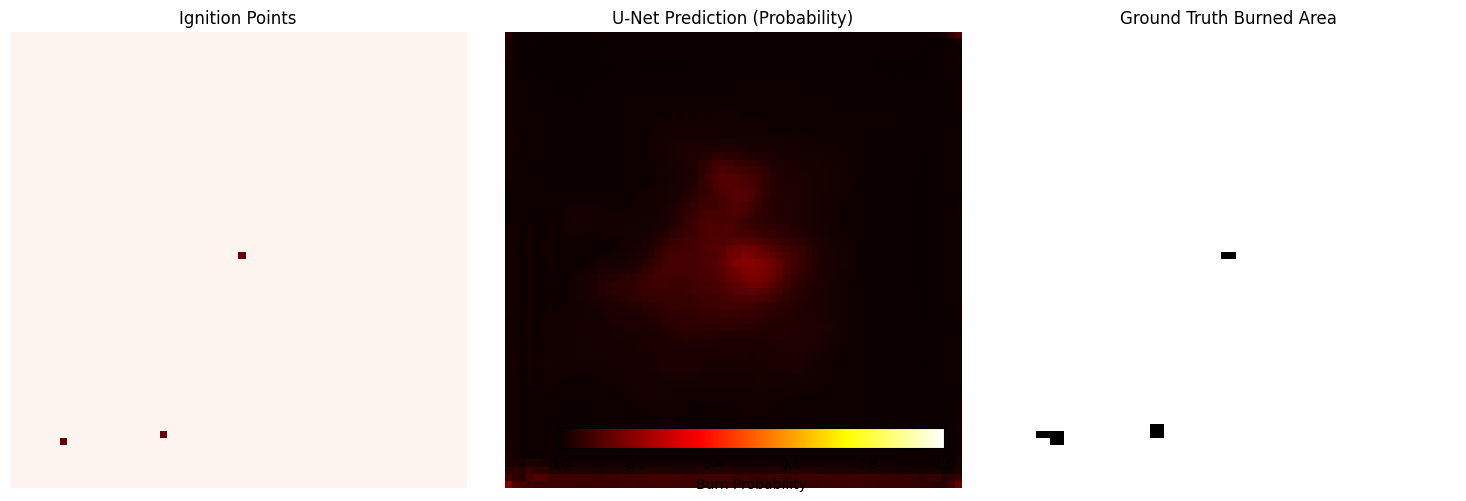

In [58]:

# Run training
if __name__ == "__main__":
    # Replace with your dataset path
    dataset_path = "/content/drive/MyDrive/b.final_burned_area"

    trainer, model = train_model(dataset_path)

Training area data collection
Validation area data collection


<ipython-input-67-10d3414a1848>:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


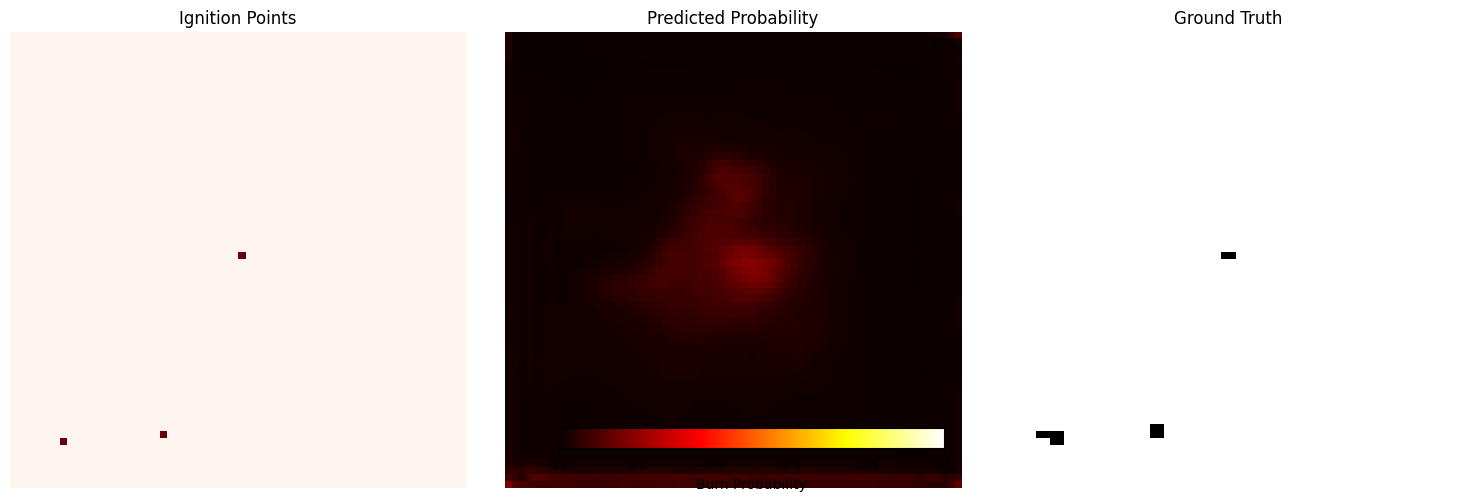

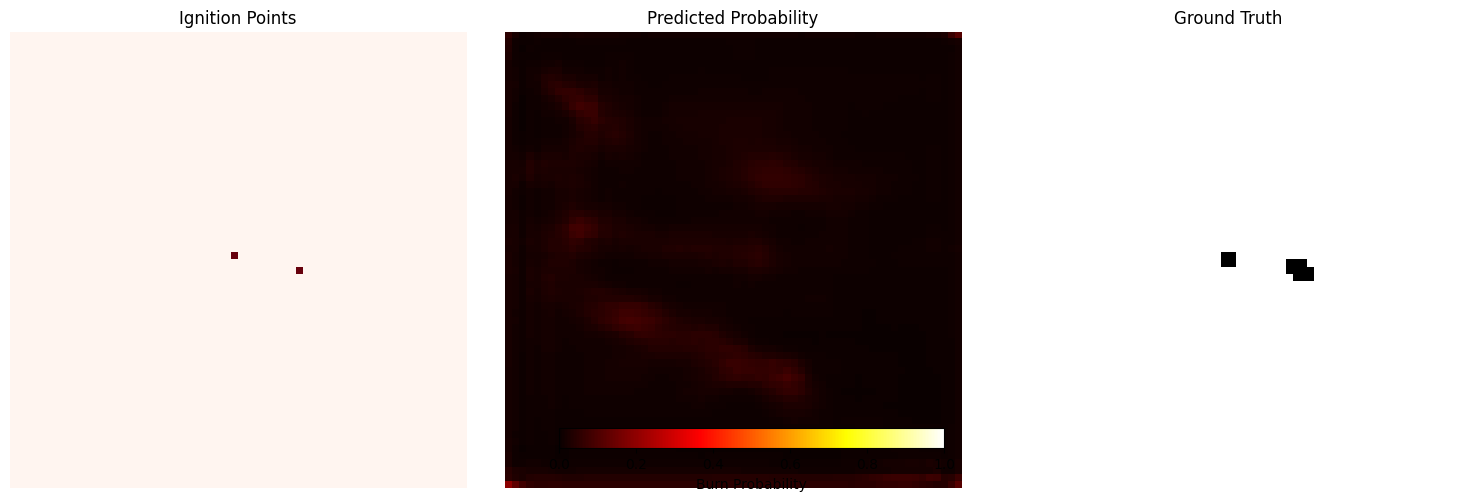

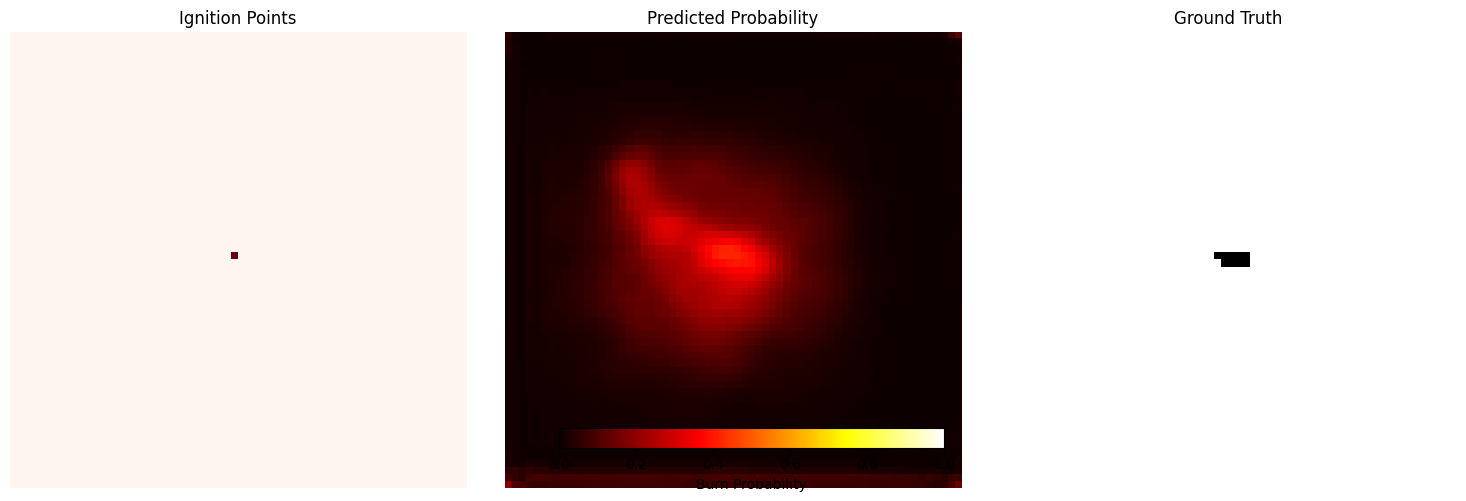

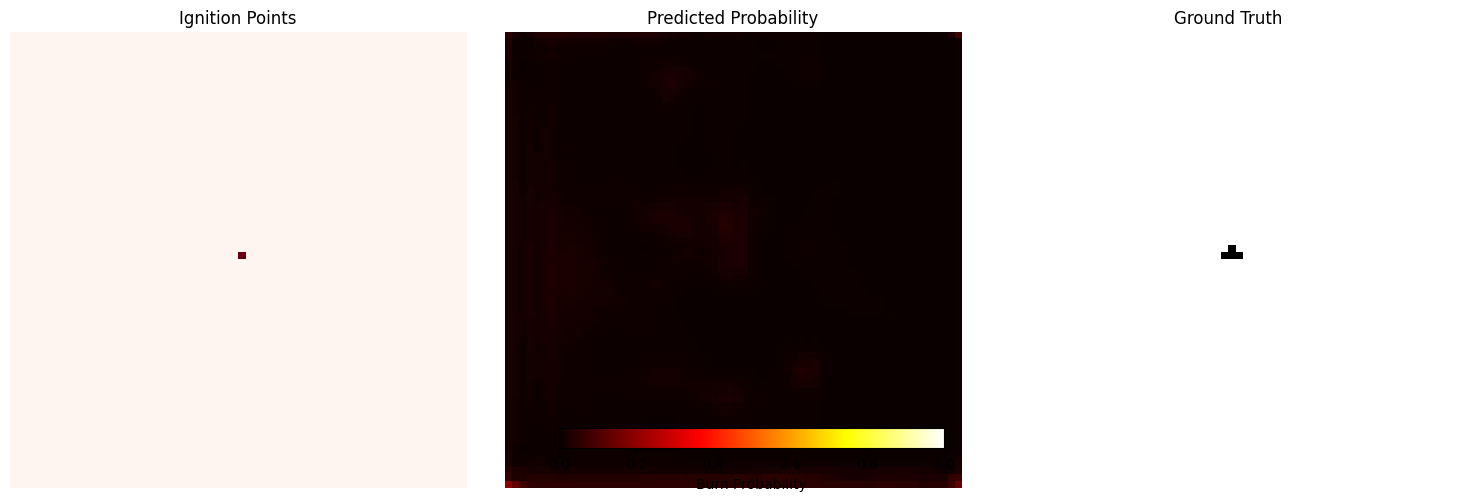

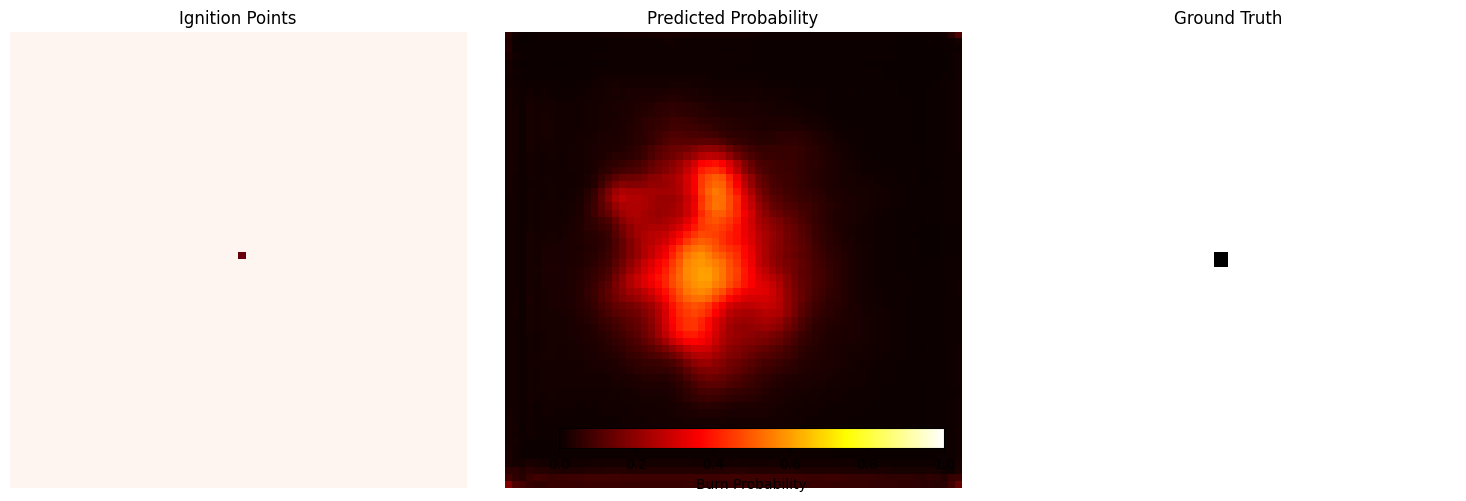

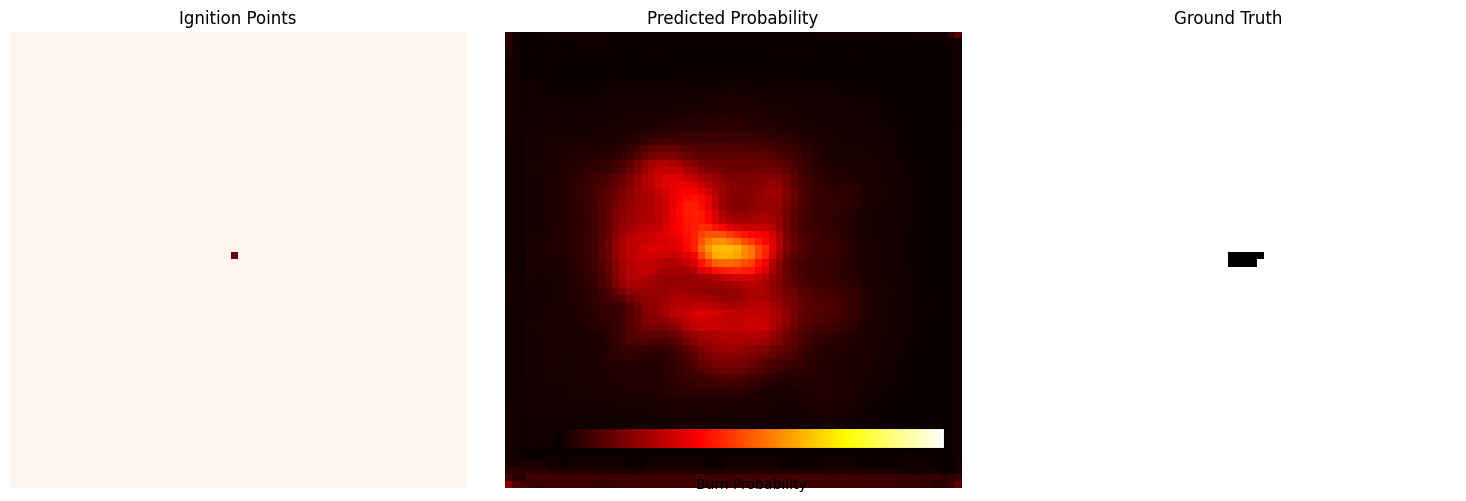

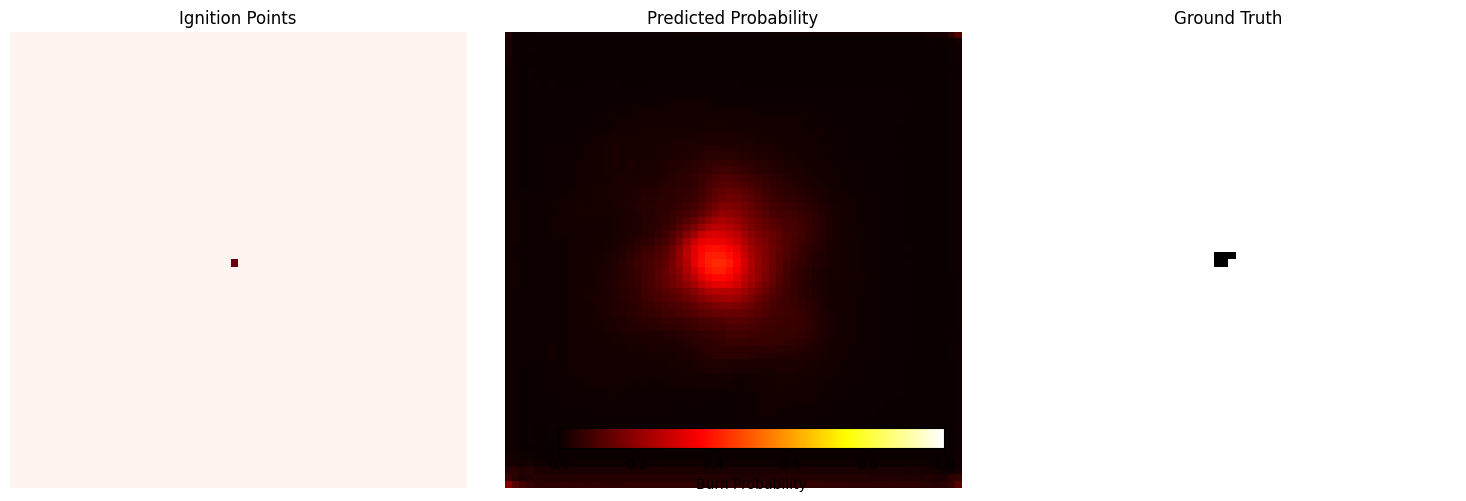

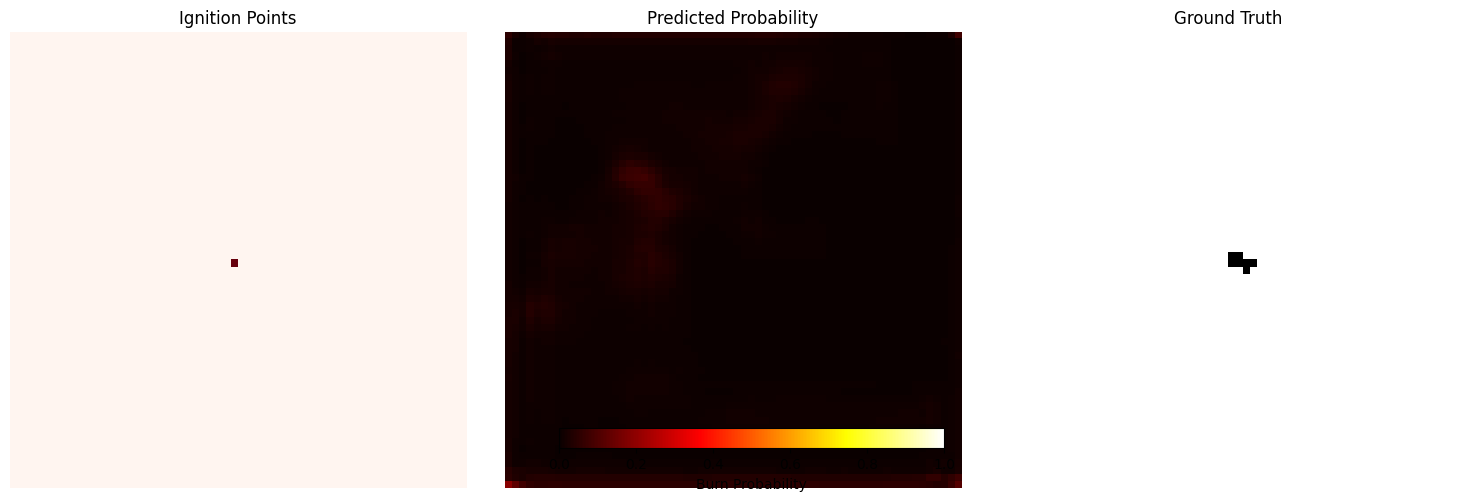

In [71]:
# 1. Initialize your data module (WITHOUT fitting)
data_module = TheDataModule(
    dataset_path=dataset_path,
    input_vars=["ignition_points", "ndvi", "roads_distance", "slope", "smi",
               "lst_day", "lst_night", "sp", "t2m", "wind_direction", "wind_speed"],
    target="burned_areas",
    batch_size=64,
    num_workers=2
)

# 2. EXPLICITLY setup the test data
data_module.setup(stage='test')  # This is crucial!

# 3. Now you can safely access test data
test_batch = next(iter(data_module.test_dataloader()))
inputs, targets = test_batch

# 4. Make predictions with your trained model
model.eval()
with torch.no_grad():
    predictions = model(inputs)
    probabilities = torch.softmax(predictions, dim=1)[:, 1]  # Get fire probabilities

# 5. Visualize results
visualize_predictions_batch(model, test_batch, num_samples=10)

In [67]:
def visualize_predictions_batch(model, test_batch, num_samples=3, save_prefix='prediction'):
    """
    Visualize predictions for multiple samples in a batch
    Args:
        model: Your trained model
        test_batch: Batch of (inputs, targets) from your DataLoader
        num_samples: Number of samples to visualize
        save_prefix: Prefix for saving plots
    """
    model.eval()
    inputs, targets = test_batch

    with torch.no_grad():
        logits = model(inputs)
        pred_probs = torch.softmax(logits, dim=1)[:, 1]  # Positive class probabilities

    for i in range(min(num_samples, inputs.shape[0])):
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Get data for this sample
        ignition = inputs[i][0].cpu().numpy()
        prob_map = pred_probs[i].cpu().numpy()
        gt = targets[i].cpu().numpy()

        # Plot ignition points
        axes[0].imshow(ignition, cmap='Reds', vmin=0, vmax=1)
        axes[0].set_title('Ignition Points')
        axes[0].axis('off')

        # Plot predictions
        im = axes[1].imshow(prob_map, cmap='hot', vmin=0, vmax=1)
        axes[1].set_title('Predicted Probability')
        axes[1].axis('off')

        # Plot ground truth
        axes[2].imshow(gt, cmap='Greys', vmin=0, vmax=1)
        axes[2].set_title('Ground Truth')
        axes[2].axis('off')

        # Add colorbar
        fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal',
                    fraction=0.05, pad=0.04, label='Burn Probability')

        plt.tight_layout()
        plt.savefig(f'{save_prefix}_sample_{i}.png', bbox_inches='tight', dpi=300)
        plt.show()

In [68]:
def make_predictions(model, data_module, num_batches=None):
    """
    Make predictions on the test set
    Args:
        model: Trained model
        data_module: Your DataModule
        num_batches: Number of batches to predict (None for all)
    Returns:
        List of tuples (inputs, predictions, targets)
    """
    model.eval()
    test_loader = data_module.test_dataloader()
    results = []

    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            if num_batches is not None and i >= num_batches:
                break

            inputs, targets = batch
            logits = model(inputs)
            probs = torch.softmax(logits, dim=1)[:, 1]  # Positive class

            results.append((
                inputs.cpu().numpy(),
                probs.cpu().numpy(),
                targets.cpu().numpy()
            ))

    return results